In [3]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn import datasets
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, precision_score, f1_score,
    precision_recall_curve, average_precision_score,
    roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
   )

import xgboost as xgb
from xgboost import XGBClassifier

import tensorflow as tf

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization 
from keras.optimizers import Adam
from keras.metrics import AUC

import warnings

import holoviews as hv

from datetime import datetime

from xgboost import XGBRFClassifier

import os

import pickle

from lazypredict.Supervised import LazyClassifier

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

# 🏦 **`DETECCION PRESTAMOS FALLIDOS`**


## 📑 Introducción

> En este proyecto, desarrollaremos una comprensión básica de la analítica de riesgos en banca y servicios financieros y entenderemos cómo se utiliza la información para minimizar el riesgo de pérdida de dinero en la concesión de prestamos a clientes. Mediante el Análisis Exploratorio de Datos (EDA) y el Aprendizaje Automático, crearemos unos modelos que determinen el riesgo de impago que poseen dichos clientes y se realizará una comparación entre lo mismos, para evaluar el modelo de mejores resultados.

## 📝 Comprensión del Negocio

> Nos situamos entidad bancaria o empresa especializada en otorgar diversos tipos de préstamos a clientes. Cuando la empresa recibe una solicitud de préstamo, debe tomar una decisión sobre la aprobación del préstamo basada en el perfil del solicitante. 

Hay dos tipos de riesgos asociados con la decisión del banco:

> - Si el solicitante es probable que devuelva el préstamo, no aprobar el préstamo resulta en una pérdida de negocio para la empresa.
> - Si el solicitante "no" es probable que devuelva el préstamo, es decir, es probable que incumpla, aprobar el préstamo puede resultar en una pérdida financiera para la empresa.

> Los datos proporcionados contienen información sobre solicitantes de préstamos anteriores y si han "incumplido" o no. El objetivo es identificar patrones que indiquen si una persona es propensa a incumplir, lo que se puede utilizar para tomar acciones como negar el préstamo, reducir la cantidad del préstamo, prestar (a solicitantes riesgosos) a una tasa de interés más alta, etc.

> Cuando una persona solicita un préstamo, existen dos tipos de decisiones que la empresa podría tomar:

### 1. `Préstamo aceptado`

Si la empresa aprueba el préstamo, hay 3 escenarios posibles descritos a continuación:

- `Pagado completamente`: El solicitante ha pagado completamente el préstamo (el principal y la tasa de interés).
- `Actual`: El solicitante está en proceso de pagar las cuotas, es decir, el plazo del préstamo aún no ha finalizado. Estos candidatos no se etiquetan como "incumplidos".
- `Cobrado como pérdida`: El solicitante no ha pagado las cuotas a tiempo durante un largo período, es decir, ha incumplido el préstamo.

### 2. `Préstamo rechazado`

La empresa ha rechazado el préstamo (porque el candidato no cumple con sus requisitos, etc.). Dado que el préstamo fue rechazado, no hay historial de transacciones de esos solicitantes con la empresa y, por lo tanto, estos datos no están disponibles en la empresa, ni consecuentemente, en su conjunto de datos.

## 🎯 Objetivos del Negocio

- Otorgar préstamos a solicitantes "con riesgo" es la fuente más grande de pérdida financiera (llamada "pérdida de crédito"). La pérdida de crédito es la cantidad de dinero perdida por el prestamista, como conscuencia del incumplimiento de pago del prestatario. En este caso, los clientes etiquetados como "cobrados como pérdida" son los "incumplidos".
- Si uno puede identificar a estos solicitantes de préstamos con riesgo elevado, entonces se pueden reducir tales préstamos, reduciendo así la cantidad de pérdida de crédito. La identificación de tales solicitantes utilizando EDA y el aprendizaje automático es el objetivo de este estudio.

- En otras palabras, la empresa quiere comprender los factores determinantes (o variables clave) detrás del incumplimiento del préstamo, es decir, las variables que son indicadores sólidos de incumplimiento, para poder utilizar este conocimiento para fijar criterios con su cartera de clientes y su evaluación de riesgos.


# 💾 **Descripción de la DATA**



Debido a que la información de prestamos está regida por la Ley de Protección de Datos, hemos obtenido de KAGGLE una base de datos genérica. Para ser lo más realista posible a las empleadas en entidades bancarias, se ha decidido utilizar, la base de datos de la compañia `LendingClub`, que es una empresa estadounidense de préstamos entre particulares con sede en San Francisco, California. Fue la primera empresa de préstamos entre particulares en registrar sus ofertas como valores ante la Comisión de Valores y Bolsa (SEC) y en ofrecer el comercio de préstamos en un mercado secundario y actualmente, es la plataforma de préstamos entre particulares más grande del mundo, que facilita préstamos personales, préstamos comerciales y financiamiento de procedimientos médicos. Los prestatarios pueden acceder fácilmente a préstamos con tasas de interés más bajas a través de una interfaz en línea rápida.

La información sobre este conjunto de datos en particular, es la siguiente:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Descripción</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>La cantidad solicitada por el prestatario. Si en algún momento, se reduce la cantidad del préstamo, se reflejará en este valor.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>Plazo del préstamo. Los valores están en meses y pueden ser 36 o 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Tasa/Tipo de interés.</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>Cuota mensual.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>Grado del préstamo asignado por LC.</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>Subgrado del préstamo asignado por LC.</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>El título del trabajo proporcionado por el prestatario al solicitar el préstamo.</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Antigüedad laboral en años. Los valores posibles están entre 0 y 10, donde 0 significa menos de un año y 10 significa diez o más años.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>El estado de propiedad de la vivienda proporcionado por el prestatario durante el registro o obtenido del informe de crédito. Nuestros valores son: Rent(alquiler), Own(propiedad), Mortgage(Hipoteca), Other(otro).</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>Los ingresos anuales informados por el prestatario durante el registro.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indica si los ingresos fueron verificados por LC, no verificados o si la fuente de ingresos fue verificada.</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>El mes en que se financió el préstamo.</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Estado actual del préstamo.</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>Finalidad del préstamo.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>El título del préstamo proporcionado por el prestatario.</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>Los primeros 3 números del código postal proporcionado por el prestatario en la solicitud de préstamo.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>Estado de EEUUU proporcionado por el prestatario en la solicitud de préstamo.</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>Pagos mesuales por deudas/Ingresos Mesuales (%). Excluidos pagos de deuda por hipoteca.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>El mes en que se abrió la primera línea de crédito informada del prestatario.</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>El número de líneas de crédito abiertas.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Número de registros públicos perjudiciales, por retrasos publicados.</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Saldo total de sus créditos revolving/rotativos.</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Porcentaje de utilizacion de creditos revolving/rotativos.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>El número total de líneas de crédito actualmente en el archivo de crédito del prestatario.</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>El estado de listado inicial del préstamo. Los valores posibles son: W, F.</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indica si el préstamo es una solicitud individual o una solicitud conjunta con dos co-prestatarios.</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Número de cuentas hipotecarias.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Número de veces que el prestatario ha solicitado la quiebra.





# 💾 **Carga del Dataset y estudio incial**

In [23]:
# data_web = pd.read_csv("/kaggle/input/lending-club-dataset/lending_club_loan.csv")
data = pd.read_csv("./data/lending_club_loan.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,...,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,...,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,...,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,...,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,...,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [24]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


>**OBJETIVO GENERAL:**
> Obtener una comprensión de cuáles variables son importantes, ver estadísticas resumidas y visualizar los datos.


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [26]:
data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [loan_status]   (count)

In [27]:
# Filtrar solo columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Crear un gráfico de pairplot
sns.pairplot(data=numeric_data)
plt.show()

KeyboardInterrupt: 

### 📌 Aviso

> Observamos una correlación casi perfecta entre la característica "loan_amnt" y la característica "installment", lo que nos hace pensar en ``posible Multicolinealidad``. Vamos a explorar más estas características. Imprimiremos sus descripciones y realizaremos un diagrama de dispersión entre ellas.


## ✔️ `loan_amnt` & `installment`

- `installment`: El pago mensual adeudado por el prestatario si el préstamo se origina.
- `loan_amnt`: La cantidad listada del préstamo solicitada por el prestatario. Si en algún momento el departamento de crédito reduce la cantidad del préstamo, se reflejará en este valor.

In [ ]:
installment = data.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Installment by Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = data.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [ ]:
loan_amnt_box = data.hvplot.box(
    y='loan_amnt', subplots=True, by='loan_status', width=300, height=350, 
    title="Loan Status by Loan Amount ", xlabel='Loan Status', ylabel='Loan Amount'
)

installment_box = data.hvplot.box(
    y='installment', subplots=True, by='loan_status', width=300, height=350, 
    title="Loan Status by Installment", xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_box + installment_box

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (installment)

In [ ]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


## ✔️ `grade` & `sub_grade`

- `grade`: Grado de préstamo asignado por LC.
- `sub_grade`: Subgrado de préstamo asignado por LC.

Vamos a explorar las columnas Grade (Grado) y SubGrade (Subgrado) que LendingClub atribuye a los préstamos.

¿Cuáles son los posibles valores únicos para `grade` y `sub_grade`?

In [ ]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


In [ ]:
# fully_paid = data.loc[data['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar() 
# charged_off = data.loc[data['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar() 

# grades = (fully_paid * charged_off).opts(
#     title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
#     width=500, height=450, legend_cols=2, legend_position='top_right'
# )

# fully_paid = data.loc[data['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.bar() 
# charged_off = data.loc[data['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.bar() 

# sub_grades = (fully_paid * charged_off).opts(
#     title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
#     width=500, height=450, legend_cols=2, legend_position='top_right', 
#     shared_axes=False
# )

# grades + sub_grades

In [ ]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Count.I  :Bars   [grade]   (count)
   .Bars.Count.II :Bars   [grade]   (count)

In [ ]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Estado del prestamo por Grado/Clasificación", xlabel='Grades', ylabel='Count',
    width=500, height=400, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Count.I  :Bars   [sub_grade]   (count)
   .Bars.Count.II :Bars   [sub_grade]   (count)

In [ ]:
# data.hvplot.bar()

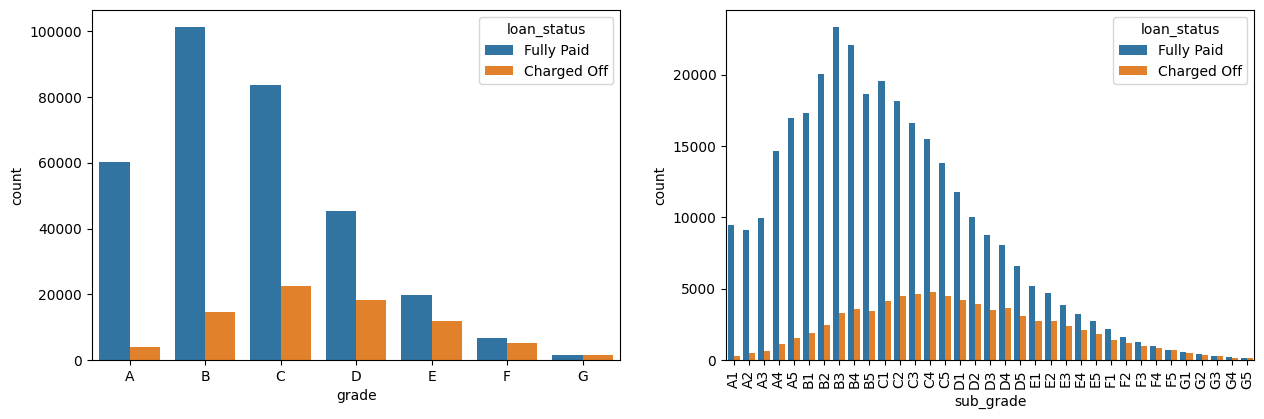

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);


Se ve que los subgrados `F` y `G` no son pagados con tanta frecuencia. Aíslelos y vuelva a crear el countplot solo para esos subgrados.

<Axes: xlabel='sub_grade', ylabel='count'>

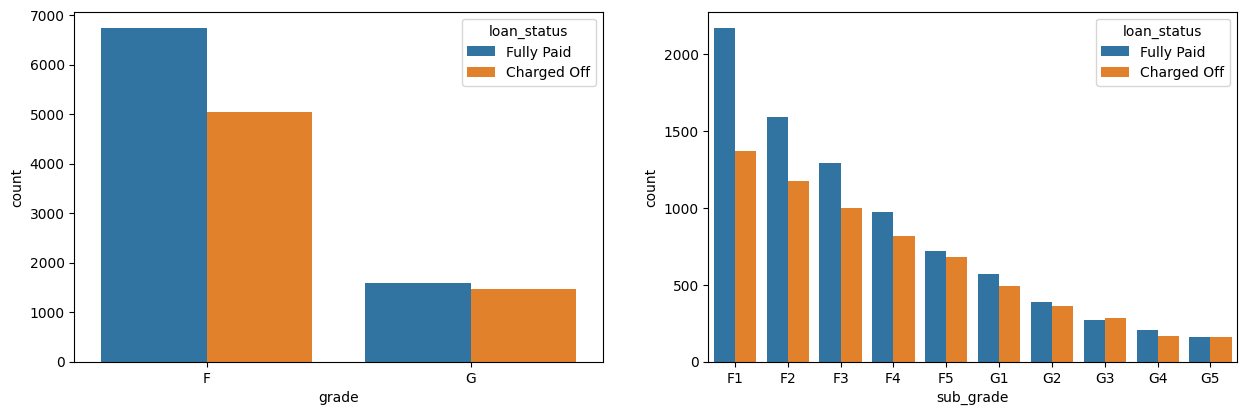

In [ ]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

## ✔️ `term`, `home_ownership`, `verification_status` & `purpose`
> - `term`: El número de pagos del préstamo. Los valores son en meses y pueden ser 36 o 60.
> - `home_ownership`: El estado de propiedad de vivienda proporcionado por el prestatario durante el registro o obtenido del informe de crédito. Nuestros valores son: RENT(Alquiler), OWN(Propiedad), MORTGAGE(Hipoteca), OTHER(Otro) 
> - `verification_status`: Indica si los ingresos fueron verificados por LC, no verificados o si la fuente de ingresos fue verificada.
> - `purpose`: Una categoría proporcionada por el prestatario para la solicitud de préstamo.

In [ ]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [ ]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'home_ownership'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'home_ownership'].value_counts().hvplot.bar()

home_ownership_count = (fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=90)

home_ownership = data.home_ownership.value_counts().hvplot.bar(
    title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count', 
    width=350, height=350, legend='top'
).opts(xrotation=90)

(home_ownership_count + home_ownership)

:Layout
   .Overlay.Count :Overlay
      .Bars.Count.I  :Bars   [home_ownership]   (count)
      .Bars.Count.II :Bars   [home_ownership]   (count)
   .Bars.Count    :Bars   [home_ownership]   (count)

In [ ]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
data.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

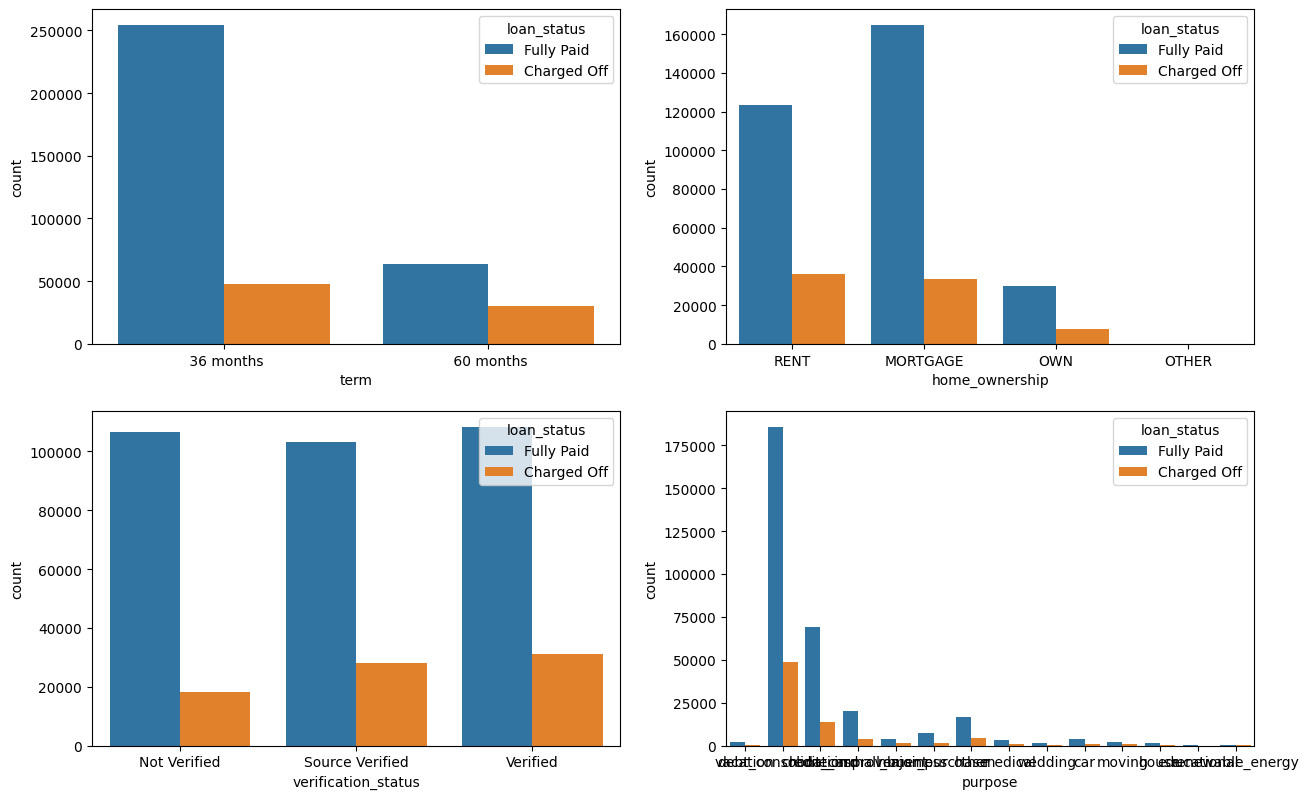

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')

In [ ]:
data.loc[data['home_ownership']=='OTHER', 'loan_status'].value_counts()

loan_status
Fully Paid     123
Charged Off     23
Name: count, dtype: int64

## ✔️ `int_rate` & `annual_inc`

> - `int_rate`: Tasa de interés del préstamo
> - `annual_inc`: Ingresos anuales autodeclarados proporcionados por el prestatario durante el registro

In [ ]:
int_rate = data.hvplot.hist(
    y='int_rate', by='loan_status', alpha=0.3, width=350, height=400,
    title="Loan Status by Interest Rate", xlabel='Interest Rate', ylabel='Loans Counts', 
    legend='top'
)

annual_inc = data.hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=350, height=400,
    title="Loan Status by Annual Income", xlabel='Annual Income', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

int_rate + annual_inc

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [int_rate]   (int_rate_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [annual_inc]   (annual_inc_count)

In [ ]:
data[data.annual_inc <= 250000].hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=500, height=400,
    title="Loan Status by Annual Income (<= 250000/Year)", 
    xlabel='Annual Income', ylabel='Loans Counts', legend='top'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (annual_inc_count)

In [ ]:
percentage1 = (data[data.annual_inc < 250000].shape[0] / data.shape[0]) * 100
rounded_percentage1 = round(percentage1, 4)
print("Porcentaje de prestatarios con sueldo < 250000:", rounded_percentage1, "%")

percentage2 = (data[data.annual_inc >= 250000].shape[0] / data.shape[0]) * 100
rounded_percentage2 = round(percentage2, 4)
print("Porcentaje de prestatarios con sueldo >= 250000:", rounded_percentage2, "%")

percentage3 = (data[data.annual_inc >= 1000000].shape[0] / data.shape[0]) * 100
rounded_percentage3 = round(percentage3, 4)
print("Porcentaje de prestatarios con sueldo >= 1000000:", rounded_percentage3, "%")


Porcentaje de prestatarios con sueldo < 250000: 98.9705 %
Porcentaje de prestatarios con sueldo >= 250000: 1.0295 %
Porcentaje de prestatarios con sueldo >= 1000000: 0.0189 %


In [ ]:
data.loc[data.annual_inc < 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     314848
Charged Off     77105
Name: count, dtype: int64

In [ ]:
# Obtén el conteo de "Charged Off" y "Fully Paid"
charged_off_count = data.loc[data.annual_inc < 250000, 'loan_status'].value_counts()['Charged Off']
fully_paid_count = data.loc[data.annual_inc < 250000, 'loan_status'].value_counts()['Fully Paid']

# Calcula el total
total = charged_off_count + fully_paid_count

# Calcula los porcentajes
charged_off_percentage = (charged_off_count / total) * 100
fully_paid_percentage = (fully_paid_count / total) * 100


print("Porcentaje de Charged Off:", charged_off_percentage, "%")
print("Porcentaje de Fully Paid:", fully_paid_percentage, "%")

Porcentaje de Charged Off: 19.672001489974562 %
Porcentaje de Fully Paid: 80.32799851002544 %


In [ ]:
data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     3509
Charged Off     568
Name: count, dtype: int64

In [ ]:
# Obtén el conteo de "Charged Off" y "Fully Paid"
charged_off_count = data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()['Charged Off']
fully_paid_count = data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()['Fully Paid']

# Calcula el total
total = charged_off_count + fully_paid_count

# Calcula los porcentajes
charged_off_percentage = (charged_off_count / total) * 100
fully_paid_percentage = (fully_paid_count / total) * 100


print("Porcentaje de Charged Off:", charged_off_percentage, "%")
print("Porcentaje de Fully Paid:", fully_paid_percentage, "%")

Porcentaje de Charged Off: 13.931812607309297 %
Porcentaje de Fully Paid: 86.0681873926907 %


In [ ]:
data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     65
Charged Off    10
Name: count, dtype: int64

In [ ]:
# Obtén el conteo de "Charged Off" y "Fully Paid"
charged_off_count = data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()['Charged Off']
fully_paid_count = data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()['Fully Paid']

# Calcula el total
total = charged_off_count + fully_paid_count

# Calcula los porcentajes
charged_off_percentage = (charged_off_count / total) * 100
fully_paid_percentage = (fully_paid_count / total) * 100

# Imprime los resultados
print("Porcentaje de Charged Off:", charged_off_percentage, "%")
print("Porcentaje de Fully Paid:", fully_paid_percentage, "%")

Porcentaje de Charged Off: 13.333333333333334 %
Porcentaje de Fully Paid: 86.66666666666667 %


Obsrevaciones:
- Parece que los préstamos con tasas de interés altas son más propensos a no ser pagados.
- La distribucion de sueldos oscila entre un 98,97% de los prestatarios cobran un sueldo >250000 dolares, un 1,02% de los prestatarios tienen ingresos anuales >= 250000, y el 0.01% >= 1000000.
- Pese a las diferencias salariales, el % de impagos (Charged off) en el primer grupo (<250000) es del 19,67%, el del segundo grupo (>= 250000) de un 13.93%, y los del tercero (>= 1000000) del 13.33%.

## ✔️ `emp_title` & `emp_length`

> - `emp_title`: El título laboral proporcionado por el prestatario al solicitar el préstamo
> - `emp_length`: Duración del empleo en años. Los valores posibles están entre 0 y 10, donde 0 significa menos de un año y 10 significa diez o más años.

In [ ]:
print(data.emp_title.isna().sum())
print(data.emp_title.nunique())

22927
173105


In [ ]:
data['emp_title'].value_counts()[:20]

emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
                            ... 
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: count, Length: 20, dtype: int64

In [ ]:
# Observo duplicado Manager con manager
data['emp_title'] = data['emp_title'].str.replace('manager', 'Manager', case=False)
data['emp_title'].value_counts()[:20]

emp_title
Manager                     5637
Teacher                     4389
Registered Nurse            1856
RN                          1846
Supervisor                  1830
                            ... 
Vice President               857
Operations Manager           834
Sales Manager                771
Administrative Assistant     756
Accountant                   748
Name: count, Length: 20, dtype: int64

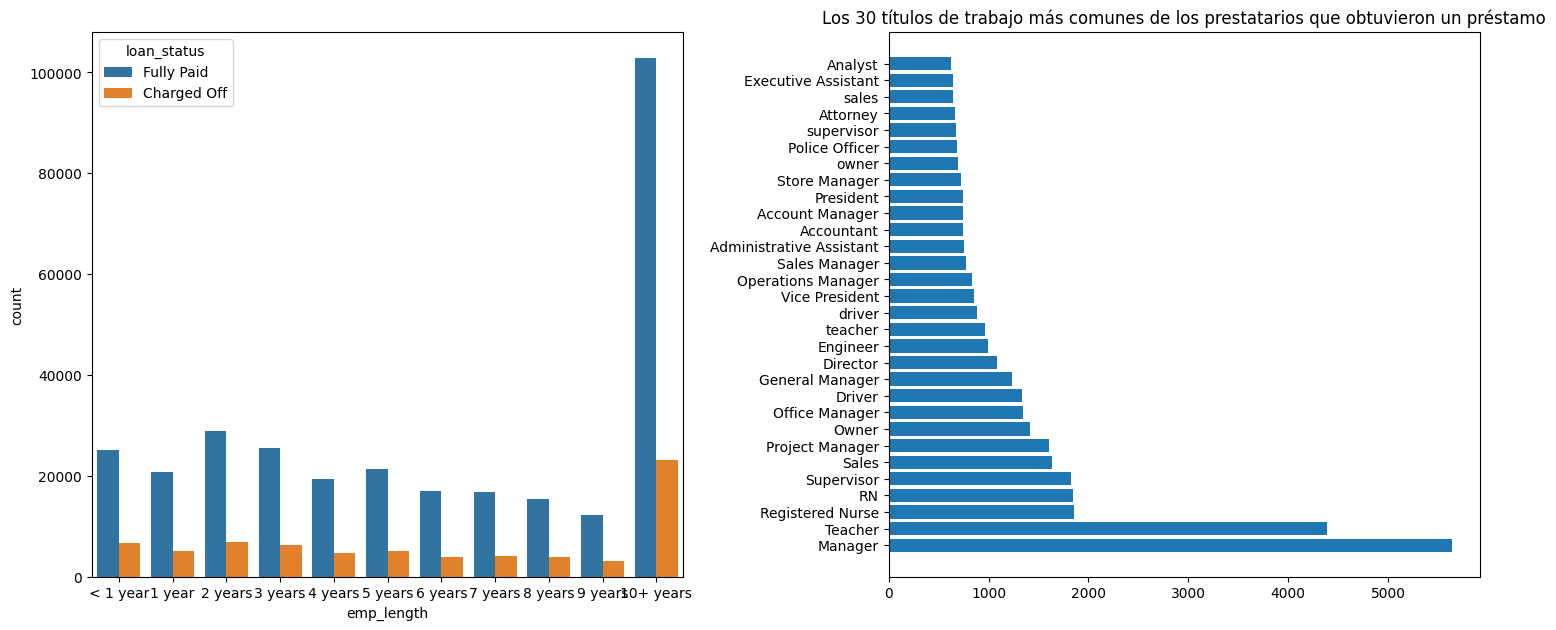

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("Los 30 títulos de trabajo más comunes de los prestatarios que obtuvieron un préstamo")
plt.tight_layout()

## ✔️ `issue_d`, `earliest_cr_line`

> - `issue_d`: El mes en el que se otorgó el préstamo.
> - `earliest_cr_line`: El mes en el que se abrió la primera línea de crédito informada del prestatario.

In [ ]:
# data.hvplot.line(x='issue_d', y='loan_status')

In [ ]:
data['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [ ]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%Y')
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')

In [ ]:
# formato habitual de fecha
'''
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%Y-%m-%d')
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%Y-%m-%d')
'''

"\ndata['issue_d'] = pd.to_datetime(data['issue_d'], format='%Y-%m-%d')\ndata['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%Y-%m-%d')\n"

In [ ]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'issue_d'].hvplot.hist(bins=35) 
charged_off = data.loc[data['loan_status']=='Charged Off', 'issue_d'].hvplot.hist(bins=35)

# fully_paid * charged_off
loan_issue_date = (fully_paid * charged_off).opts(
    title="Estado del ptmo. por fecha cuando se otorga)", xlabel='Loan Issue Date', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=45)

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'earliest_cr_line'].hvplot.hist(bins=35) 
charged_off = data.loc[data['loan_status']=='Charged Off', 'earliest_cr_line'].hvplot.hist(bins=35)

earliest_cr_line = (fully_paid * charged_off).opts(
    title="Estado del ptmo. por 1ª linea de credito", xlabel='earliest_cr_line', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=45)

loan_issue_date + earliest_cr_line

:Layout
   .Overlay.I  :Overlay
      .Histogram.I  :Histogram   [issue_d]   (issue_d_count)
      .Histogram.II :Histogram   [issue_d]   (issue_d_count)
   .Overlay.II :Overlay
      .Histogram.I  :Histogram   [earliest_cr_line]   (earliest_cr_line_count)
      .Histogram.II :Histogram   [earliest_cr_line]   (earliest_cr_line_count)

## ✔️ `title`

> - `title`: título/descripción del préstamo proporcionado por el prestatario

In [ ]:
data.title.isna().sum()

1756

In [ ]:
data['title'] = data.title.str.lower()

In [ ]:
data.title.value_counts()[:10]

title
debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: count, dtype: int64

Observamos que la mayoría de préstamos se refieren a la Consolidacion de Deudas y Refinanciación de tarjetas de credito

La columna `title` se eliminará porque tenemos la columna `purpose` que se genera a partir de ella.

## ✔️ `dti`, `open_acc`, `revol_bal`, `revol_util`, & `total_acc`

> - `dti`: Una relación calculada utilizando los pagos mensuales totales de deuda del prestatario en las obligaciones de deuda totales, excluyendo la hipoteca y el préstamo LC solicitado, dividido por los ingresos mensuales autodeclarados del prestatario.
> - `open_acc`: El número de líneas de crédito abiertas en el archivo de crédito del prestatario.
> - `revol_bal`: Saldo total de crédito rotativo.
> - `revol_util`: Tasa de utilización de líneas rotativas, o la cantidad de crédito que el prestatario está utilizando en relación con todo el crédito rotativo disponible.
> - `total_acc`: El número total de líneas de crédito actualmente en el archivo de crédito del prestatario.

In [ ]:
data.dti.value_counts()

dti
0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: count, Length: 4262, dtype: int64

In [ ]:
dti = data.hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="Distribución dti", xlabel='dti', ylabel='Count'
)

sub_dti = data[data['dti']<=50].hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="Distribución dti (<=50)", xlabel='dti', ylabel='Count', shared_axes=False
)

dti + sub_dti

:Layout
   .Histogram.I  :Histogram   [dti]   (dti_count)
   .Histogram.II :Histogram   [dti]   (dti_count)

In [ ]:
print(data[data['dti']>=40].shape)

(296, 27)


In [ ]:
data.loc[data['dti']>=50, 'loan_status'].value_counts()

loan_status
Fully Paid     26
Charged Off     9
Name: count, dtype: int64

In [ ]:
dti = data[data['dti']<=50].hvplot.hist(
    y='dti', by='loan_status', bins=50, width=300, height=350, 
    title="Distribución de DTI (<=50)", xlabel='DTI', ylabel='Conteo', 
    alpha=0.3, legend='top'
)

title = "Estado del préstamo por número de líneas de crédito abiertas"

open_acc = data.hvplot.hist(
    y='open_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='Número de líneas de crédito abiertas', ylabel='Conteo', 
    alpha=0.4, legend='top'
)

title = "Estado del préstamo por número total de líneas de crédito"

total_acc = data.hvplot.hist(
    y='total_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='Número total de líneas de crédito', ylabel='Conteo', 
    alpha=0.4, legend='top'
)

dti + open_acc + total_acc

:Layout
   .NdOverlay.I   :NdOverlay   [loan_status]
      :Histogram   [dti]   (dti_count)
   .NdOverlay.II  :NdOverlay   [loan_status]
      :Histogram   [open_acc]   (open_acc_count)
   .NdOverlay.III :NdOverlay   [loan_status]
      :Histogram   [total_acc]   (total_acc_count)

In [ ]:
print(data.shape)
print(data[data.open_acc > 40].shape)

(396030, 27)
(217, 27)


In [ ]:
print(data.shape)
print(data[data.total_acc > 80].shape)

(396030, 27)
(266, 27)


In [ ]:
print(data.shape)
print(data[data.revol_util > 120].shape)

(396030, 27)
(27, 27)


In [ ]:
title = "Estado del préstamo por Tasa de utilización de líneas de crédito giratorias"

revol_util = data.hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Tasa de utilización de líneas de crédito giratorias', ylabel='Conteo', 
    alpha=0.4, legend='top'
)

title = "Estado del préstamo por Tasa de utilización de líneas de crédito giratorias (<120)"

sub_revol_util = data[data.revol_util < 120].hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Tasa de utilización de líneas de crédito giratorias', ylabel='Conteo', 
    shared_axes=False, alpha=0.4, legend='top'
)

revol_util + sub_revol_util

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)

In [ ]:
data[data.revol_util > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.00,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.00,...,2.00,0.00,2677.00,892.30,9.00,f,INDIVIDUAL,0.00,0.00,"12506 Connie Burg\r\nVelasquezfort, TN 00813"


In [ ]:
print(data.shape)
print(data[data.revol_bal > 250000].shape)

(396030, 27)
(397, 27)


In [ ]:
title = "Estado del préstamo por Saldo total de crédito giratorio"

revol_bal = data.hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Saldo total de crédito giratorio', ylabel='Conteo', 
    alpha=0.4, legend='top'
)

title = "Estado del préstamo por Saldo total de crédito giratorio (<250,000)"

sub_revol_bal = data[data['revol_bal']<=250000].hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Saldo total de crédito giratorio', ylabel='Conteo', 
    alpha=0.4, legend='top', shared_axes=False
).opts(xrotation=45)

revol_bal + sub_revol_bal

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)

In [ ]:
data.loc[data.revol_bal > 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     351
Charged Off     46
Name: count, dtype: int64

- Parece que cuanto menor sea el `dti`, es más probable que el préstamo no se pague.

- Solo `217` prestatarios tienen más de `40` líneas de crédito abiertas.
- Solo `266` prestatarios tienen más de `80` líneas de crédito abiertas en el archivo de crédito del prestatario.
- Solo `27` prestatarios tienen más de `120` líneas de crédito abiertas.


## ✔️ `pub_rec`, `initial_list_status`, `application_type`, `mort_acc`, & `pub_rec_bankruptcies`

> - `pub_rec`: Número de registros públicos perjudiciales.
> - `initial_list_status`: El estado inicial de la lista del préstamo. Los valores posibles son - W, F.
> - `application_type`: Indica si el préstamo es una solicitud individual o una solicitud conjunta con dos codeudores.
> - `mort_acc`: Número de cuentas hipotecarias.
> - `pub_rec_bankruptcies`: Número de quiebras en registros públicos.

In [ ]:
xlabel = "Número de registros públicos derogatorios"
title = "Estado del préstamo por el número de registros públicos derogatorios"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Conteo',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [pub_rec]   (count)
   .Bars.Count.II :Bars   [pub_rec]   (count)

In [ ]:
xlabel = "Estado inicial en la lista del préstamo"
title = "Estado del préstamo por el estado inicial en la lista del préstamo"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'initial_list_status'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'initial_list_status'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Conteo',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [initial_list_status]   (count)
   .Bars.Count.II :Bars   [initial_list_status]   (count)

In [ ]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'application_type'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'application_type'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title="Estado del préstamo por Tipo de Aplicación", xlabel="Tipo de Aplicación", ylabel='Conteo',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [application_type]   (count)
   .Bars.Count.II :Bars   [application_type]   (count)

In [ ]:
xlabel = "Número de bancarrotas previas registradas"
title = "Estado del préstamo por el número de bancarrotas previas registradas"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec_bankruptcies'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec_bankruptcies'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Conteo',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [pub_rec_bankruptcies]   (count)
   .Bars.Count.II :Bars   [pub_rec_bankruptcies]   (count)

In [ ]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [ ]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

Text(0, 0.5, 'Conteo')

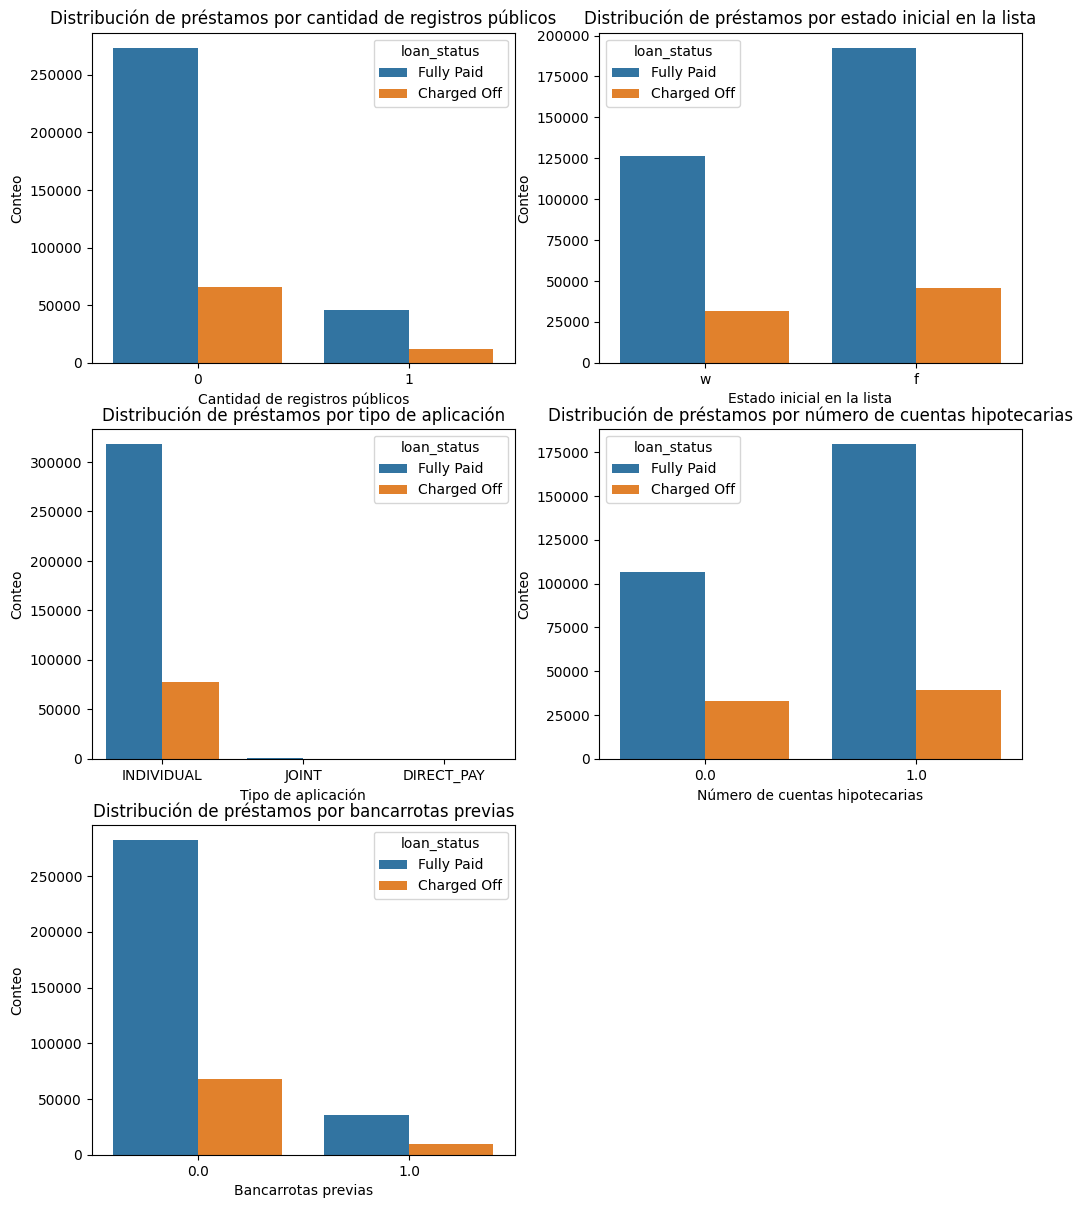

In [ ]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')
plt.title("Distribución de préstamos por cantidad de registros públicos")
plt.xlabel("Cantidad de registros públicos")
plt.ylabel("Conteo")

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')
plt.title("Distribución de préstamos por estado inicial en la lista")
plt.xlabel("Estado inicial en la lista")
plt.ylabel("Conteo")

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')
plt.title("Distribución de préstamos por tipo de aplicación")
plt.xlabel("Tipo de aplicación")
plt.ylabel("Conteo")

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')
plt.title("Distribución de préstamos por número de cuentas hipotecarias")
plt.xlabel("Número de cuentas hipotecarias")
plt.ylabel("Conteo")

# El último gráfico con título y etiquetas de ejes
plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')
plt.title("Distribución de préstamos por bancarrotas previas")
plt.xlabel("Bancarrotas previas")
plt.ylabel("Conteo")

## 📈 Correlaciones entre variables - Correlación LINEAL

In [ ]:
# Variablle OBJETIVO 'loan_status' (vrb-categórica)
target='loan_status'

In [ ]:
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

### Relaciones LINEALES - Columnas numéricas

<Axes: >

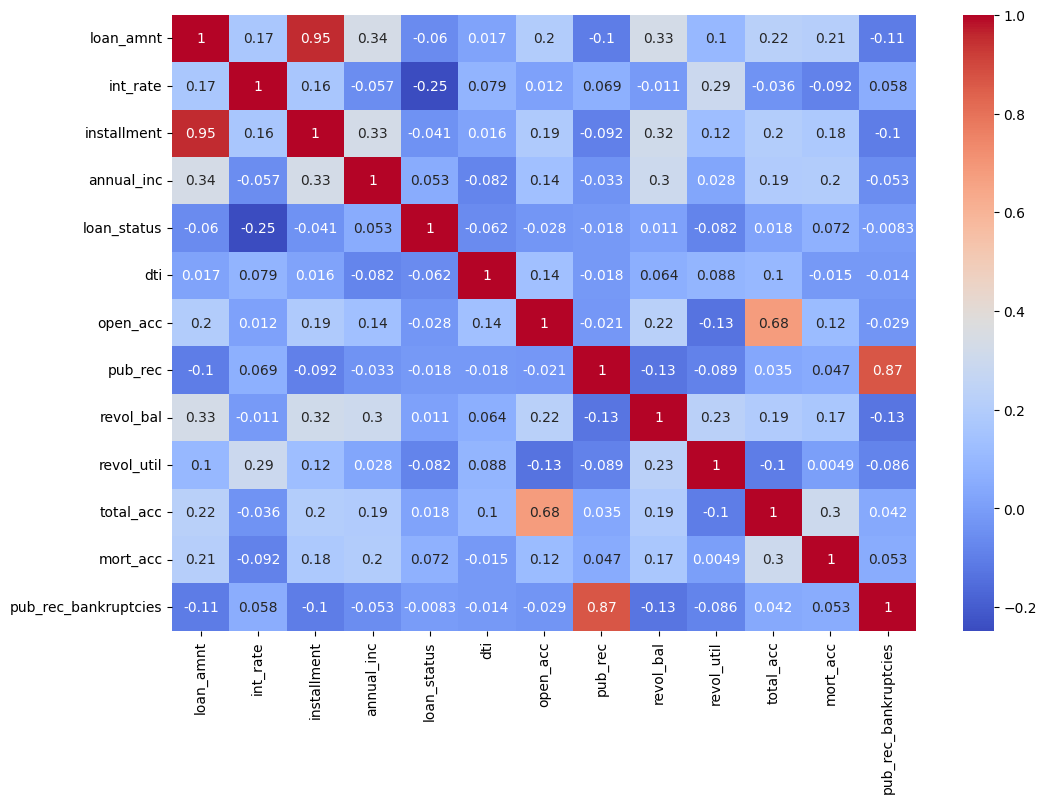

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])  # Filtrar solo columnas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm') # 'viridis'

In [ ]:
# CORRELACIONES LINEALES ENTRE TODAS LAS COLUMNAS
'''
# Excluir columnas no numéricas antes de calcular la matriz de correlación
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

# ENTRE TODAS LAS VARIABLES
# Encontrar las relaciones más fuertes en términos de correlación
strongest_correlations = correlation_matrix.abs().unstack().sort_values(ascending=False)
strongest_correlations = strongest_correlations[strongest_correlations < 0.9]  # Excluir correlaciones perfectas o multicolinealidad

# Mostrar las relaciones más fuertes
print(strongest_correlations.head(10))
'''

"\n# Excluir columnas no numéricas antes de calcular la matriz de correlación\nnumeric_columns = data.select_dtypes(include=['float64', 'int64']).columns\ncorrelation_matrix = data[numeric_columns].corr()\n\n# ENTRE TODAS LAS VARIABLES\n# Encontrar las relaciones más fuertes en términos de correlación\nstrongest_correlations = correlation_matrix.abs().unstack().sort_values(ascending=False)\nstrongest_correlations = strongest_correlations[strongest_correlations < 0.9]  # Excluir correlaciones perfectas o multicolinealidad\n\n# Mostrar las relaciones más fuertes\nprint(strongest_correlations.head(10))\n"

In [ ]:
# Excluir columnas no numéricas antes de calcular la matriz de correlación
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

# Mostrar las relaciones más fuertes con el OBJETIVO/TARGET
correlation_excluding_target = correlation_matrix[target].abs().sort_values(ascending=False)

strongest_correlations_excluding_target = correlation_excluding_target[correlation_excluding_target < 0.90]
print("Correlaciones LINEALES con el Target:")
print(strongest_correlations_excluding_target.head(15))

Correlaciones LINEALES con el Target:
int_rate               0.25
revol_util             0.08
mort_acc               0.07
dti                    0.06
loan_amnt              0.06
                       ... 
open_acc               0.03
pub_rec                0.02
total_acc              0.02
revol_bal              0.01
pub_rec_bankruptcies   0.01
Name: loan_status, Length: 12, dtype: float64


In [ ]:
import pandas as pd
import hvplot.pandas

# Tu código existente
target = 'loan_status'
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()[target].drop(target).abs()

# Ordenar la correlación de manera descendente
sorted_correlation = correlation.sort_values(ascending=True)

# Generar un gráfico de barras de correlación ordenado
sorted_correlation.hvplot.barh(
    width=600, height=400, 
    title="Correlación Lineal entre Target y Características Numéricas", 
    ylabel='Correlación (Valor Absoluto)', xlabel='Características Numéricas'
)

:Bars   [index]   (loan_status)

****
## Conclusión:
Observamos que hay dos tipos de características:

- 1. Características relacionadas con el solicitante (variables demográficas como ocupación, detalles de empleo, etc.),
- 2. Características relacionadas con las características del préstamo (importe del préstamo, tasa de interés, propósito del préstamo, etc.). Aunque aparentemente algunas de estas variables estén linealmente muy relacionadas, ello se debe a que, el cálculo de un préstamo, se obtiene formulando las mismas. Multicolinealidad ?

La correlación lineal, entre las variables del conjunto de grupos con la variable objetivo, es muy escasa, motivo por el cual decido, proceder a estudiarlas pormenorizadamente, con anterioridad a su posible supresión.
****

# 🔄 **Pre/procesamiento de datos**


**Objetivos de la sección:** 
> - Eliminar o completar cualquier dato faltante.
> - Eliminar características innecesarias o redundantes.
> - Convertir características categóricas de tipo cadena en variables ficticias.
> - Comprobación y tratamiento de valores atipicos/nulos/0 etc.


In [ ]:
print(f"Longitud de la Data: {data.shape}")

Longitud de la Data: (396030, 27)


## 🔖 Valores faltantes

In [ ]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': Número de valores faltantes '{missing}' ==> '{portion:.3f}%'")

'emp_title': Número de valores faltantes '22927' ==> '5.789%'
'emp_length': Número de valores faltantes '18301' ==> '4.621%'
'title': Número de valores faltantes '1756' ==> '0.443%'
'revol_util': Número de valores faltantes '276' ==> '0.070%'
'mort_acc': Número de valores faltantes '37795' ==> '9.543%'
'pub_rec_bankruptcies': Número de valores faltantes '535' ==> '0.135%'


In [ ]:
# Imputar los valores faltantes con la media/mediana
'''
df.fillna(df.mean(), inplace=True)
'''

'\ndf.fillna(df.mean(), inplace=True)\n'

### `emp_title`

In [ ]:
data.emp_title.nunique()

172683

En realidad, hay demasiados títulos de trabajo únicos para intentar convertir esto en una característica de variable ficticia. Vamos a eliminar la columna "emp_title".

In [ ]:
data.drop('emp_title', axis=1, inplace=True)

### `emp_length`

In [ ]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [ ]:
for year in data.emp_length.unique():
    print(f"{year} in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years in this position:
loan_status
1   0.82
0   0.18
Name: proportion, dtype: float64
4 years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
< 1 year in this position:
loan_status
1   0.79
0   0.21
Name: proportion, dtype: float64
6 years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
9 years in this position:
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
2 years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
3 years in this position:
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
8 years in this position:
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
7 years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
5 years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
1 year in this position:
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
nan in this positio

Las tasas de incumplimiento son extremadamente similares en todas las duraciones de empleo. Por lo tanto, vamos a eliminar la columna `emp_length`.


In [ ]:
data.drop('emp_length', axis=1, inplace=True)

### `title`

In [ ]:
data.title.value_counts().head()

title
debt consolidation         168108
credit card refinancing     51781
home improvement            17117
other                       12993
consolidation                5583
Name: count, dtype: int64

In [ ]:
data.purpose.value_counts().head()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: count, dtype: int64

La columna "title" es simplemente una subcategoría/descripción en formato de cadena de la columna "purpose". Por lo tanto, vamos a eliminar la columna "title".

In [ ]:
data.drop('title', axis=1, inplace=True)

### `mort_acc`

Hay varias formas de abordar los datos faltantes. Podríamos intentar construir un modelo simple para completarlos, como un modelo lineal. También podríamos llenarlos basándonos en la media de las otras columnas, o incluso podríamos agrupar las columnas en categorías y establecer NaN como su propia categoría. No hay un enfoque 100% correcto.

Vamos a revisar las otras columnas para ver cuál se correlaciona más con "mort_acc".

In [ ]:
data.mort_acc.value_counts()

mort_acc
1.00    218458
0.00    139777
Name: count, dtype: int64

In [ ]:
data.mort_acc.isna().sum()

37795

In [ ]:
# Excluir la columna 'mort_acc' y otras columnas no numéricas
numeric_data = data.select_dtypes(include=['number'])

# Calcular la correlación con 'mort_acc' y tomar el valor absoluto
correlation = numeric_data.corr()['mort_acc'].drop('mort_acc').abs()

# Ordenar la correlación de manera descendente
sorted_correlation = correlation.sort_values(ascending=True)

# Generar un gráfico de barras de correlación
sorted_correlation.hvplot.barh(
    width=600, height=400, 
    title="Correlación entre Mort Acc y Características Numéricas", 
    ylabel='Correlación (Valor Absoluto)', xlabel='Características Numéricas'
)

:Bars   [index]   (mort_acc)

Parece que la característica "total_acc" (num tot de lineas de credito) se correlaciona con "mort_acc",(num. de cuentas hipotecarias) ¡esto tiene sentido! Vamos a probar este enfoque fillna(). Agruparemos el marco de datos por "total_acc" y calcularemos el valor promedio de "mort_acc" por entrada de "total_acc" para obtener el resultado deseado

In [ ]:
data['mort_acc'] = pd.to_numeric(data['mort_acc'], errors='coerce')
total_acc_avg = data.groupby(by='total_acc')['mort_acc'].mean()

In [ ]:
def fill_mort_acc(row):
    total_acc, mort_acc = row['total_acc'], row['mort_acc']
    if np.isnan(mort_acc):
        return total_acc_avg.loc[total_acc].round()
    else:
        return mort_acc

In [ ]:
data['mort_acc'] = data.apply(fill_mort_acc, axis=1)

### `revol_util` & `pub_rec_bankruptcies`

In [ ]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


Estas dos características tienen puntos de datos faltantes, pero representan menos del 0.5% del total de los datos, concretamente el 0,205% de los mismos. Por lo tanto, vamos a eliminar las filas que carecen de valores en esas columnas utilizando el método dropna().

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(395219, 24)

## 🧮 Variables categóricas y variables ficticias (dummy variables).

In [ ]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'address']


### `term`

In [ ]:
print(data['term'].unique())

[' 36 months' ' 60 months']


In [ ]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [ ]:
print(data['term'].unique())

[36 60]


In [ ]:
data= data.copy()

### `grade` & `sub_grade`

Sabemos que `grade` es simplemente una subcaracterística de `sub_grade`, por lo que vamos a eliminarla.


In [ ]:
data.drop('grade', axis=1, inplace=True)

In [ ]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

### `address`
Vamos a realizar ingeniería de características en una columna de códigos postales a partir de la dirección en el conjunto de datos. Crearemos una columna llamada 'zip_code' que extraerá el código postal de la columna de direcciones.

In [ ]:
data.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [ ]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [ ]:
data.zip_code.value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [ ]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)

In [ ]:
data.drop('address', axis=1, inplace=True)

### `issue_d` 

Esto sería una fuga de datos, ya que no sabríamos de antemano si se emitiría un préstamo al usar nuestro modelo. En teoría, no tendríamos una "issue_date", así que eliminemos esta característica.

In [ ]:
data.drop('issue_d', axis=1, inplace=True)

### `earliest_cr_line`
Esto parece ser una característica de sello de tiempo histórico, sobre el que se abrió la primera linea de credito. Extraemos el año de esta característica y luego lo conviertimos en una característica numérica.

In [ ]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')
data['earliest_cr_line'] = data['earliest_cr_line'].dt.year

In [ ]:
data.earliest_cr_line.nunique()

65

In [ ]:
data.earliest_cr_line.value_counts()

earliest_cr_line
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

In [ ]:
data.drop('earliest_cr_line', axis=1, inplace=True)

In [ ]:
def data_report(data):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(data.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(data.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(data.isnull().sum() * 100 / len(data), 2)
    percent_missing_data = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(data.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(data), 2)
    percent_cardin_data = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_data, unicos, percent_cardin_data], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T
        
data_report(data)

COL_N,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
DATA_TYPE,float64,int64,float64,float64,float64,int64,float64,float64,int64,float64,...,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
MISSINGS (%),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
UNIQUE_VALUES,1390,2,532,55339,26680,2,4225,40,2,54236,...,2,2,2,2,2,2,2,2,2,2
CARDIN (%),0.36,0.00,0.14,14.15,6.82,0.00,1.08,0.01,0.00,13.86,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## 🔖 Filas y/o características duplicadas

In [ ]:
print(f"Data shape: {data.shape}")

## Remove duplicate Features
# data = data.T.drop_duplicates()
# data = data.T

## Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(f"Data shape: {data.shape}")

Data shape: (395219, 78)
Data shape: (395219, 78)


## 🔖 Valores nulos

In [ ]:
# Verificar valores faltantes en el DataFrame
missing_values = data.isnull().sum()

# Mostrar las columnas con valores faltantes y la cantidad de valores faltantes en cada una
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
# Manejo de datos faltantes (ejemplo de imputación media)
'''
df.fillna(df.mean(), inplace=True)
'''

'\ndf.fillna(df.mean(), inplace=True)\n'

## 🔖 Nans o valores inf.

In [ ]:
# Contar valores NaN en cada columna
nan_count = data.isnull().sum()

# Contar valores infinitos (infs) en cada columna
inf_count = data.isin([np.inf, -np.inf]).sum()

# Filtrar las columnas que tienen al menos un NaN o infinito
columns_with_nan = nan_count[nan_count > 0]
columns_with_inf = inf_count[inf_count > 0]

# Calcular el conteo total de valores NaN e infinitos
total_nan_count = columns_with_nan.sum()
total_inf_count = columns_with_inf.sum()

# Imprimir las columnas con valores NaN o infinitos y el conteo total
print("Columnas con valores NaN:")
print(columns_with_nan)

print("\nColumnas con valores infinitos:")
print(columns_with_inf)

print(f"\nConteo total de valores NaN: {total_nan_count}")
print(f"Conteo total de valores infinitos: {total_inf_count}")

Columnas con valores NaN:
Series([], dtype: int64)

Columnas con valores infinitos:
Series([], dtype: int64)

Conteo total de valores NaN: 0
Conteo total de valores infinitos: 0


## 🔖 Valores "0"

In [ ]:
import pandas as pd

def buscar_ceros(data):
    # Obtener una lista de columnas numéricas
    columnas_numericas = data.select_dtypes(include='number').columns
    
    # Obtener el número total de filas en el DataFrame
    total_filas = len(data)
    
    # Iterar sobre las columnas y buscar ceros
    for columna in columnas_numericas:
        ceros_en_columna = (data[columna] == 0).sum()
        porcentaje_ceros = (ceros_en_columna / total_filas) * 100
        
        if ceros_en_columna > 0:
            print(f"'{columna}': {ceros_en_columna} ceros ({porcentaje_ceros:.2f}% )")


buscar_ceros(data)

'annual_inc': 1 ceros (0.00% )
'loan_status': 77523 ceros (19.62% )
'dti': 285 ceros (0.07% )
'pub_rec': 337489 ceros (85.39% )
'revol_bal': 1883 ceros (0.48% )
'revol_util': 2183 ceros (0.55% )
'mort_acc': 152875 ceros (38.68% )
'pub_rec_bankruptcies': 350108 ceros (88.59% )


Reviso lo que ocurre en cada columna, centrandome en aquellas donde el % se significativo:
- 'loan_status': es mi objetivo y sólo me indica que el 19,62% del los prestamos acabaron en fallidos. ``OK``
- 'pub_rec': el numero de registros publicos perjudiciales. Lo normal es que los clientes no tengan. ``OK``
- 'mort_acc': Número de cuentas hipotecarias. Muchos clientes solicitan prestamos personales pero no hipotecarios. ``OK``
- 'pub_rec_bankruptcies': registro de bancarrotas previas.Lo normal es que los clientes no tengan. ``OK``

A la vista de ello, a priori, no debemos que suprimir dichas columnas, dado que los datos son correctos.


In [ ]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improve

## 🔖 Outliers - Cómo procedo con los valores atipicos?

In [ ]:
### Aproximacion inicial/rápida: fijo un umbral y reviso para hacerme una idea. En nuestro caso no es necesario, porque previamente los he revisado cada columna de forma individual
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Función para detectar outliers con Z-Score
def detectar_outliers_zscore(columna, umbral_z=3):
    z_scores = np.abs(stats.zscore(columna))
    outliers = z_scores > umbral_z
    return outliers

# Detección de outliers con Z-Score para cada columna numérica
for col_name in data.select_dtypes(include=np.number).columns:
    # Detección de outliers con Z-Score
    outliers_zscore = detectar_outliers_zscore(data[col_name])
   
# Calcular y mostrar el umbral Z-Score para cada columna numérica
for col_name in data.select_dtypes(include=np.number).columns:
    columna = data[col_name]
    z_score_threshold = 6  # se puede ajustar este umbral según sea necesario
    z_scores = np.abs(stats.zscore(columna))
    outliers = z_scores > z_score_threshold

# Obtener valores dentro y fuera del umbral Z-Score
    valores_no_outliers = columna[~outliers]
    valores_outliers = columna[outliers]

    print(f'Columna: {col_name} Umbral:{z_score_threshold}')
    print(f'Valores no outliers (min, max): ({valores_no_outliers.min()}, {valores_no_outliers.max()})')
    print(f'Valores outliers (min, max): ({valores_outliers.min()}, {valores_outliers.max()})\n')
'''

"\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom scipy import stats\n\n# Función para detectar outliers con Z-Score\ndef detectar_outliers_zscore(columna, umbral_z=3):\n    z_scores = np.abs(stats.zscore(columna))\n    outliers = z_scores > umbral_z\n    return outliers\n\n# Detección de outliers con Z-Score para cada columna numérica\nfor col_name in data.select_dtypes(include=np.number).columns:\n    # Detección de outliers con Z-Score\n    outliers_zscore = detectar_outliers_zscore(data[col_name])\n   \n# Calcular y mostrar el umbral Z-Score para cada columna numérica\nfor col_name in data.select_dtypes(include=np.number).columns:\n    columna = data[col_name]\n    z_score_threshold = 6  # se puede ajustar este umbral según sea necesario\n    z_scores = np.abs(stats.zscore(columna))\n    outliers = z_scores > z_score_threshold\n\n# Obtener valores dentro y fuera del umbral Z-Score\n    valores_no_outliers = columna[~outliers]\n

In [ ]:
### Representacion grafica de outlayers
'''
columnas_deseadas = ['annual_inc', 'dti', 'open_acc', 'total_acc', 'revol_util', 'revol_bal']

# Detección de outliers con Z-Score para cada columna deseada
for col_name in columnas_deseadas:
    # Detección de outliers con Z-Score
    outliers_zscore = detectar_outliers_zscore(data[col_name])

    # Visualización de outliers para la columna actual
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=data, x=data.index, y=col_name, hue=outliers_zscore, palette={True: 'red', False: 'blue'})
    plt.title(f'Outliers con Z-Score - {col_name}')
    plt.xlabel('Índice de Datos')
    plt.ylabel(f'Valor de {col_name}')
    plt.show()
'''

"\ncolumnas_deseadas = ['annual_inc', 'dti', 'open_acc', 'total_acc', 'revol_util', 'revol_bal']\n\n# Detección de outliers con Z-Score para cada columna deseada\nfor col_name in columnas_deseadas:\n    # Detección de outliers con Z-Score\n    outliers_zscore = detectar_outliers_zscore(data[col_name])\n\n    # Visualización de outliers para la columna actual\n    plt.figure(figsize=(8, 4))\n    sns.scatterplot(data=data, x=data.index, y=col_name, hue=outliers_zscore, palette={True: 'red', False: 'blue'})\n    plt.title(f'Outliers con Z-Score - {col_name}')\n    plt.xlabel('Índice de Datos')\n    plt.ylabel(f'Valor de {col_name}')\n    plt.show()\n"

In [ ]:
# relacion entre columnas deseadas
'''
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas deseadas
columnas_deseadas = ['annual_inc', 'revol_bal']

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=len(columnas_deseadas), figsize=(15, 4), sharex=True)

# Configuración de estilo de Seaborn
sns.set_style("whitegrid")

# Itera sobre las columnas deseadas
for i, columna in enumerate(columnas_deseadas):
    # Plotea el boxplot para cada columna
    sns.boxplot(data=data[columna], ax=ax[i], orient='v', width=0.4)
    ax[i].set_xlabel(columna)

# Muestra la figura
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Columnas deseadas\ncolumnas_deseadas = [\'annual_inc\', \'revol_bal\']\n\n# Ajustes de la figura de Matplotlib\nfig, ax = plt.subplots(nrows=1, ncols=len(columnas_deseadas), figsize=(15, 4), sharex=True)\n\n# Configuración de estilo de Seaborn\nsns.set_style("whitegrid")\n\n# Itera sobre las columnas deseadas\nfor i, columna in enumerate(columnas_deseadas):\n    # Plotea el boxplot para cada columna\n    sns.boxplot(data=data[columna], ax=ax[i], orient=\'v\', width=0.4)\n    ax[i].set_xlabel(columna)\n\n# Muestra la figura\nplt.show()\n'

In [ ]:
data.shape

(395219, 78)

In [ ]:
# Como previamente los he estudiado pormenorizadamente, priorizo los resultados individualizados anteriores

# Opción más eficiente, combinar todas las condiciones en una sola
combined_condition = (
    (data['annual_inc'] <= 250000) &
    (data['dti'] <= 50) &
    (data['open_acc'] <= 40) &
    (data['total_acc'] <= 80) &
    (data['revol_util'] <= 120) &
    (data['revol_bal'] <= 250000)
)
data = data.loc[combined_condition]
data.shape

(391205, 78)

## 🔖 Correlaciones entre variables - Correlación NO LINEAL

### Utilización del ``Algoritmo de DECISION TREE`` para obtener correlaciones NO LINEALES

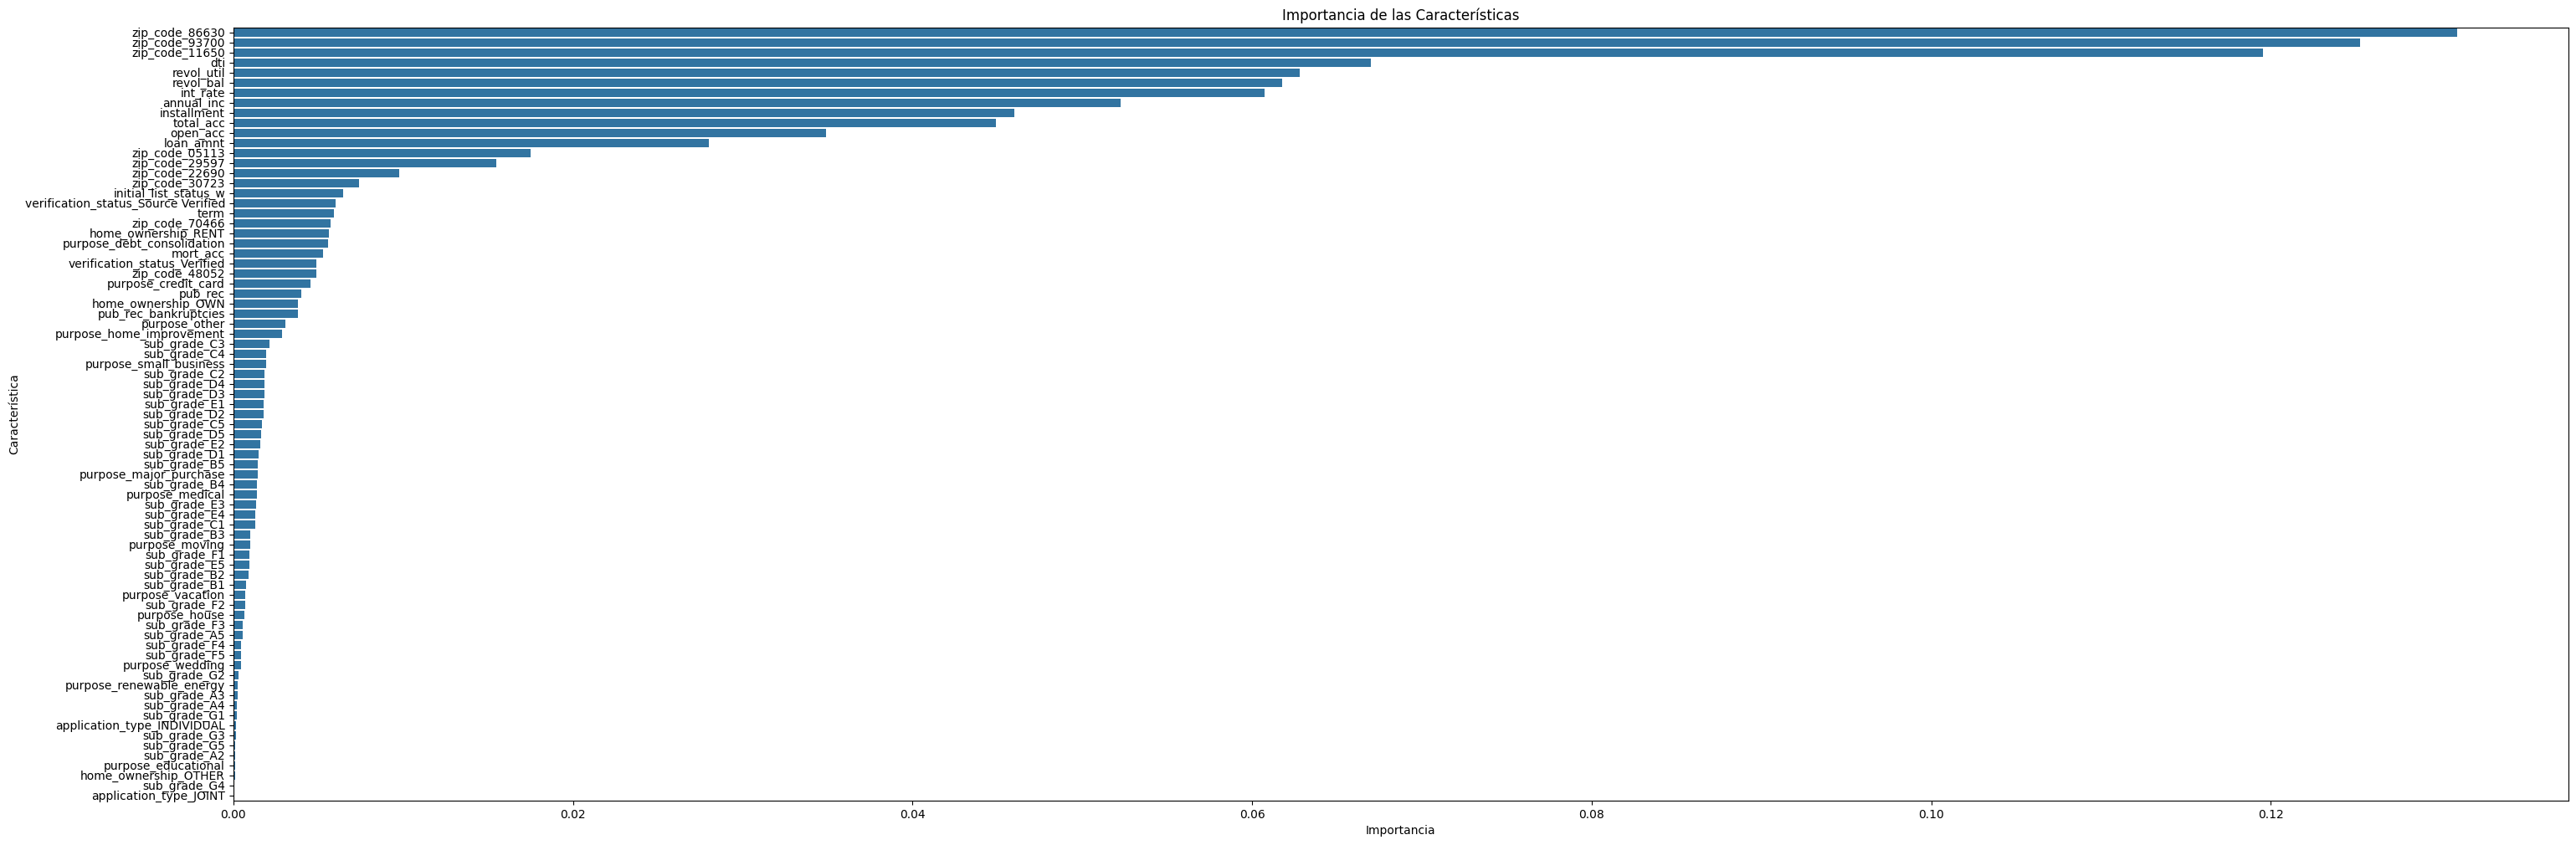

Importancia de las características NO LINEALES con el target:
                   Feature  Importance
75          zip_code_86630        0.13
76          zip_code_93700        0.13
69          zip_code_11650        0.12
5                      dti        0.07
9               revol_util        0.06
..                     ...         ...
13            sub_grade_A2        0.00
51     purpose_educational        0.00
65    home_ownership_OTHER        0.00
45            sub_grade_G4        0.00
64  application_type_JOINT        0.00

[77 rows x 2 columns]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Suponiendo que df es tu DataFrame
target = 'loan_status'
X = data.drop([target], axis=1)
y = data[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

dtr_clf = DecisionTreeClassifier()
dtr_clf.fit(X_train, Y_train)

# Obtener la lista de características (excluyendo el target)
feature_columns = [col for col in data.columns if col != target]

# Obtener la importancia de las características después de aplicar el modelo
feature_importance = dtr_clf.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importance_dt = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia de mayor a menor
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

# Crear un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(36, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dt, orient='h')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

# Imprimir la importancia de las características ordenadas
print("Importancia de las características NO LINEALES con el target:")
print(feature_importance_dt)

In [ ]:
data.shape

(391205, 78)

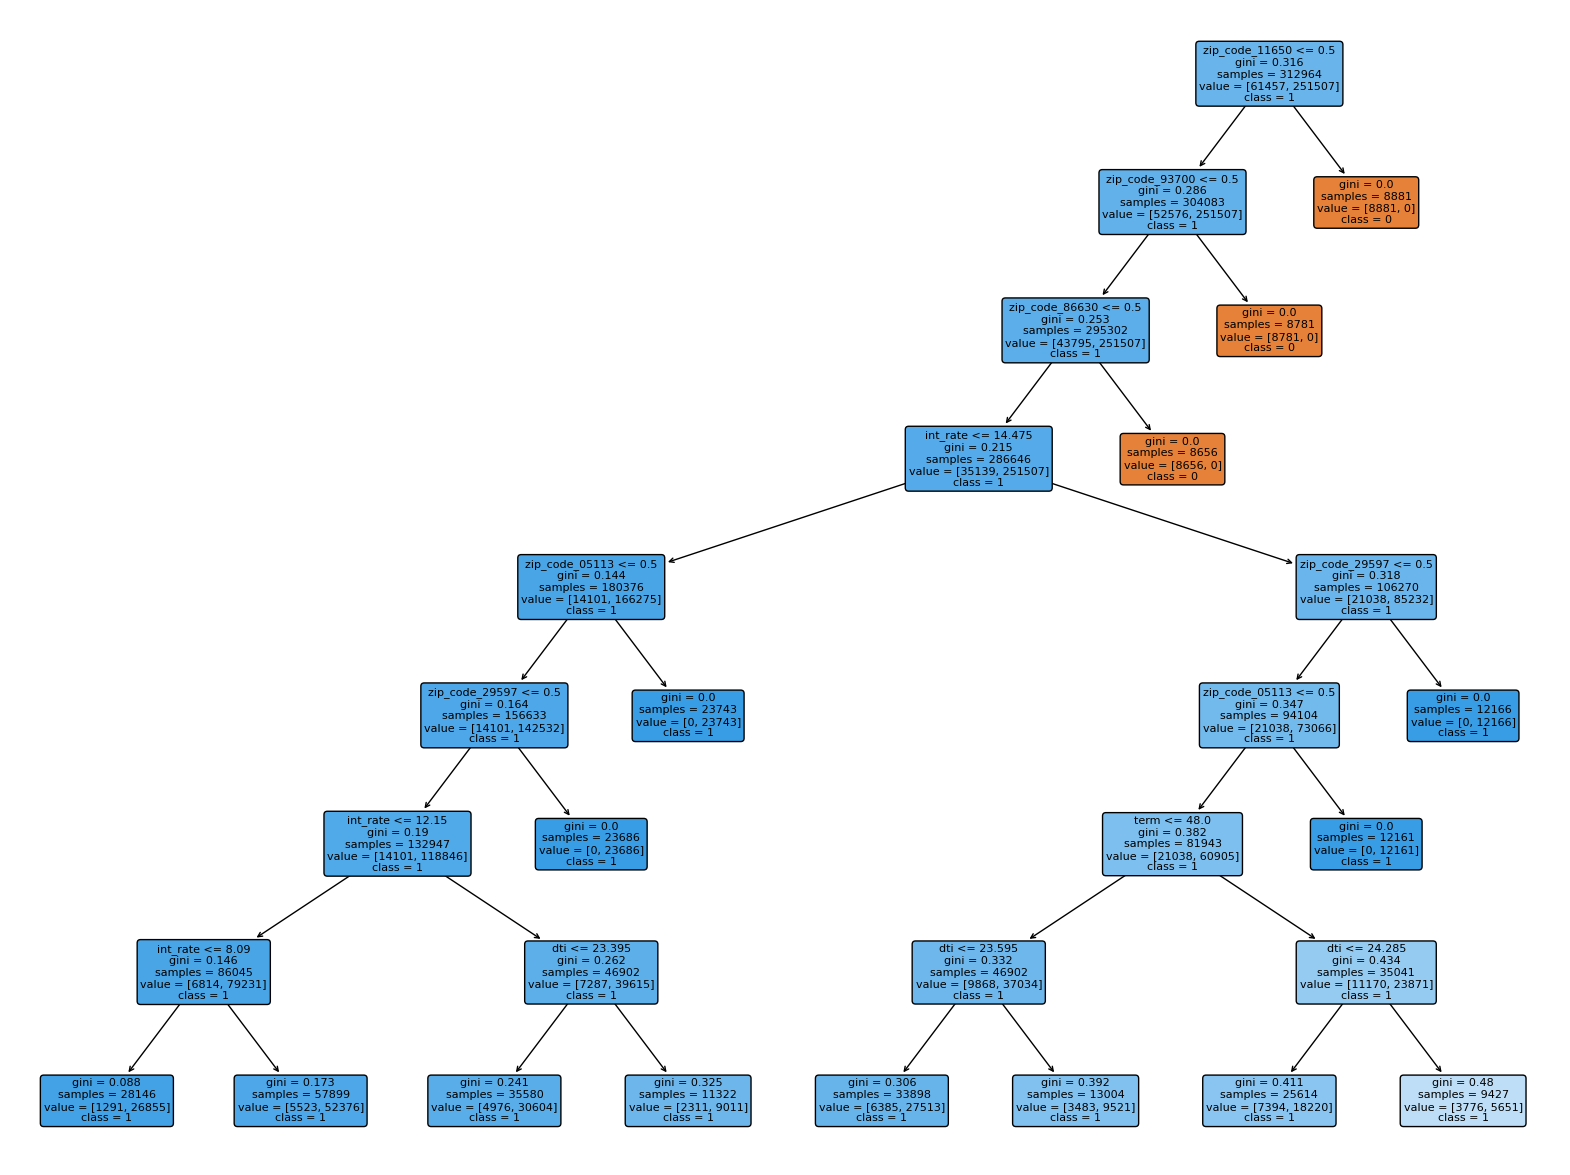

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dtr_clf = DecisionTreeClassifier(random_state=42, max_depth=8)
dtr_clf.fit(X_train, Y_train)

plt.figure(figsize=(20, 15))
plot_tree(dtr_clf,
          filled=True,
          feature_names=X.columns,  # Specify the feature names here
          class_names=[str(i) for i in dtr_clf.classes_],
          rounded=True,
          fontsize=8);

plt.show()

In [ ]:
# Filtrar las columnas con feature_importance_dt igual a 0
columns_to_drop = feature_importance_dt[feature_importance_dt['Importance'] == 0]['Feature'].tolist()

# Crear un nuevo DataFrame sin las columnas con feature_importance_dt igual a 0
data_clean= data.drop(columns=columns_to_drop)
data_clean.shape


(391205, 78)

In [ ]:
data=data_clean

In [ ]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improve

# ✅ **Salvado de data tras el análisis exploratorio de datos (EDA)**

In [ ]:
data.to_csv('./Data/lending-club-loan_clean.csv', index=False)

In [8]:
df = pd.read_csv('./Data/lending-club-loan_clean.csv')

# 🔪 **División de entrenamiento y prueba**

In [9]:
target = 'loan_status'
df[target].value_counts(normalize=True) # con el normalize saco el %

loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64

In [10]:
target = 'loan_status'
df[target].value_counts() # con el normalize saco el %

loan_status
1    314264
0     76941
Name: count, dtype: int64

### BALANCEO DE DATOS - No aplicado por empeorameinto de resultados

In [ ]:
# considero que no es necesario balancear
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Dividir el DataFrame en características (X) y la variable objetivo (y)
target='loan_status'
X = df.drop([target], axis=1)
y = df[target]

# Inicializar el RandomOverSampler
under_sampler = RandomUnderSampler(random_state=42)

# Aplicar sobre-muestreo
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Crear un nuevo DataFrame balanceado
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced[target] = y_resampled

# Verificar el balance de las clases en el nuevo DataFrame
print(df_balanced[target].value_counts())

loan_status
0    76941
1    76941
Name: count, dtype: int64


In [ ]:
df_balanced.to_csv('./Data/lending-club-loan_clean_balanced.csv', index=False)

In [ ]:
df1 = pd.read_csv('./Data/lending-club-loan_clean_balanced.csv')

In [ ]:
# PARA TRABAJAR CON LA DATA BALANCEADA
# df=df1.copy()

### TRAIN TEST SPLIT

In [11]:
'''
X = df.drop([target], axis=1)
y = df[target]
'''
X = np.array(df.drop([target], axis=1))  
y = np.array(df[target])


In [12]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # % de reserva para el Test

X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

print(df.shape)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_train shape: ', y_train.shape)
print('Y_test shape: ', y_test.shape)

(391205, 78)
X_train shape:  (312964, 77)
X_test shape:  (78241, 77)
Y_train shape:  (312964,)
Y_test shape:  (78241,)


# 📏 **Normalizando la data**

In [13]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [14]:
X_train.dtypes

loan_amnt         float64
term                int64
int_rate          float64
installment       float64
annual_inc        float64
                   ...   
zip_code_30723       bool
zip_code_48052       bool
zip_code_70466       bool
zip_code_86630       bool
zip_code_93700       bool
Length: 77, dtype: object

In [15]:
print(train.shape)

(312964, 78)


In [16]:
# Escalado de características
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### Estandarizacion - Aplicada directamente sobre los modelos que lo requieren

In [17]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T
        
data_report(df)

COL_N,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
DATA_TYPE,float64,int64,float64,float64,float64,int64,float64,float64,int64,float64,...,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
MISSINGS (%),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
UNIQUE_VALUES,1390,2,532,55339,26680,2,4225,40,2,54236,...,2,2,2,2,2,2,2,2,2,2
CARDIN (%),0.36,0.00,0.14,14.15,6.82,0.00,1.08,0.01,0.00,13.86,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [18]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
columnas_booleanas = df.select_dtypes(include='bool').columns.tolist()
columnas_texto = df.select_dtypes(exclude=['float64', 'int64', 'bool']).columns.tolist()
columnas_ordenadas = columnas_numericas + columnas_booleanas + columnas_texto

num_columnas_numericas = len(columnas_numericas)
num_columnas_booleanas = len(columnas_booleanas)
num_columnas_texto = len(columnas_texto)
num_columnas_ordenadas = len(columnas_numericas)+len(columnas_booleanas)+len(columnas_texto)

print(f'Total: {num_columnas_ordenadas} columnas: {columnas_ordenadas}')
print('--'*60)
print(f'Total: {num_columnas_numericas} Col.Numericas: {columnas_numericas}')
print(f'Total: {num_columnas_booleanas} Col.Booleanas: {columnas_booleanas}')
print(f'Total: {num_columnas_texto} Col.Texto: {columnas_texto}')

Total: 78 columnas: ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving

Estandarización Numéricas

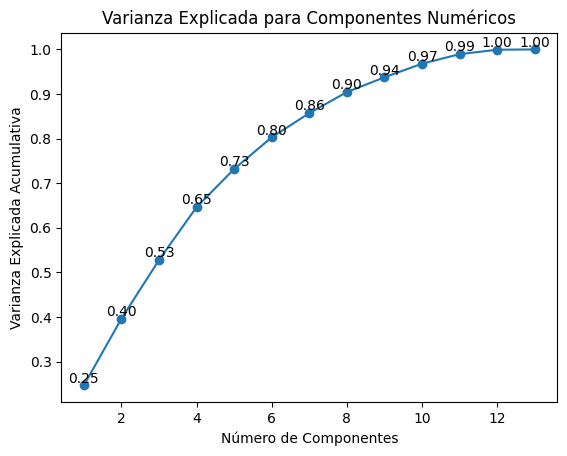


Número óptimo de componentes para numéricas (95% de varianza explicada): 10


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from prince import CA

# Seleccionar columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_numericas = df[columnas_numericas]

# Extraer la variable objetivo 'loan_status'
y = df_numericas['loan_status']
df_numericas = df_numericas.drop('loan_status', axis=1)

# Estandarizar los datos numéricos después de la extracción de 'loan_status'
scaler_numericas = StandardScaler()
df_numericas_estandarizado = scaler_numericas.fit_transform(df_numericas)

# Aplicar PCA a las columnas numéricas estandarizadas
pca_numericas = PCA()
pca_numericas.fit_transform(df_numericas_estandarizado)
varianza_explicada_numericas = pca_numericas.explained_variance_ratio_

# Graficar la varianza explicada acumulativa con números en la curva
fig, ax = plt.subplots()
ax.plot(range(1, len(varianza_explicada_numericas) + 1), np.cumsum(varianza_explicada_numericas), marker='o')
ax.set_xlabel('Número de Componentes')
ax.set_ylabel('Varianza Explicada Acumulativa')
ax.set_title('Varianza Explicada para Componentes Numéricos')

# Agregar números a la curva
for i, valor in enumerate(np.cumsum(varianza_explicada_numericas)):
    ax.text(i + 1, valor, f'{valor:.2f}', ha='center', va='bottom')

plt.show()
# Calcular la proporción de varianza explicada acumulativa para numéricas
proporcion_acumulativa_numericas = np.cumsum(varianza_explicada_numericas)

# Encontrar el número óptimo de componentes para el 95% de varianza explicada
umbral_varianza = 0.95
numero_optimo_componentes_numericas = np.argmax(proporcion_acumulativa_numericas >= umbral_varianza) + 1

print(f'\nNúmero óptimo de componentes para numéricas (95% de varianza explicada): {numero_optimo_componentes_numericas}')


Estandarización Booleanas

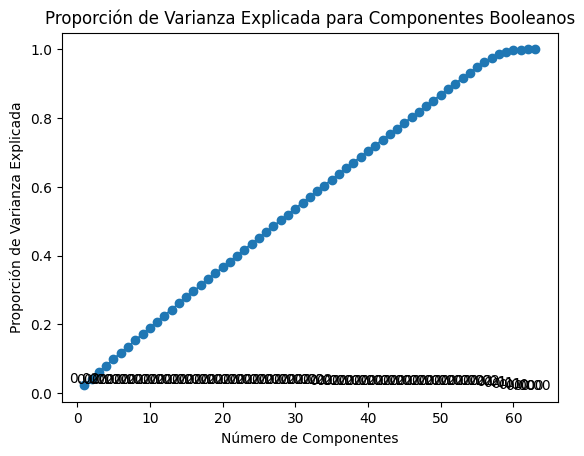

Número óptimo de componentes para booleanas: 56


In [20]:
import prince
from prince import MCA

# Obtener las columnas booleanas
columnas_booleanas = df.select_dtypes(include='bool').columns.tolist()

# Convertir True a 1 y False a 0 en las columnas booleanas
df_booleanas_num = df[columnas_booleanas].astype(int)

# Aplicar MCA a las columnas booleanas transformadas
ca_booleanas = prince.MCA(n_components=64, one_hot=False)
ca_booleanas.fit_transform(df_booleanas_num)

# Obtener los valores propios
valores_propios_booleanas = ca_booleanas.eigenvalues_

# Calcular la proporción de varianza explicada
proporcion_varianza_explicada_booleanas = valores_propios_booleanas / sum(valores_propios_booleanas)

# Graficar la proporción de varianza explicada para las columnas booleanas
fig, ax = plt.subplots()
ax.plot(range(1, len(proporcion_varianza_explicada_booleanas) + 1), proporcion_varianza_explicada_booleanas.cumsum(), marker='o')
ax.set_xlabel('Número de Componentes')
ax.set_ylabel('Proporción de Varianza Explicada')
ax.set_title('Proporción de Varianza Explicada para Componentes Booleanos')

# Agregar números a la curva
for i, valor in enumerate(proporcion_varianza_explicada_booleanas):
    ax.text(i + 1, valor, f'{valor:.2f}', ha='center', va='bottom')

plt.show()

# Imprimir el número óptimo de componentes basándote en la proporción acumulativa de varianza explicada
proporcion_acumulativa_booleanas = np.cumsum(proporcion_varianza_explicada_booleanas)
numero_optimo_componentes_booleanas = np.argmax(proporcion_acumulativa_booleanas >= 0.95) + 1

print(f'Número óptimo de componentes para booleanas: {numero_optimo_componentes_booleanas}')

Fusion de variables estandarizadas: PCA (Numericas) MCA (Booleanas)

In [21]:
# Seleccionar columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_numericas = df[columnas_numericas]

# Extraer la variable objetivo 'loan_status'
y = df_numericas['loan_status']
df_numericas = df_numericas.drop('loan_status', axis=1)

# Estandarizar los datos numéricos después de la extracción de 'loan_status'
scaler_numericas = StandardScaler()
df_numericas_estandarizado = scaler_numericas.fit_transform(df_numericas)

# Aplicar PCA a las columnas numéricas estandarizadas
num_componentes_numericas = 10
pca_numericas = PCA(n_components=num_componentes_numericas)
df_pca_numericas = pca_numericas.fit_transform(df_numericas_estandarizado)

# Obtener las columnas booleanas
columnas_booleanas = df.select_dtypes(include='bool').columns.tolist()
# Convertir True a 1 y False a 0 en las columnas booleanas
df_booleanas_num = df[columnas_booleanas].astype(int)

# Aplicar CA a las columnas booleanas
num_componentes_booleanas = 56
mca_booleanas = prince.MCA(n_components=num_componentes_booleanas, one_hot=False)
df_mca_booleanas = mca_booleanas.fit_transform(df_booleanas_num)

# Concatenar a lo largo de las columnas (eje 1)
df_final = pd.concat([pd.DataFrame(df_pca_numericas), pd.DataFrame(df_mca_booleanas)], axis=1)
df_final = df_final.reset_index(drop=True)

# Verificar las dimensiones antes de la concatenación
print("Dimensiones de df_pca_numericas:", df_pca_numericas.shape)
print("Dimensiones de df_mca_booleanas:", df_mca_booleanas.shape)

# Imprimir las primeras filas del DataFrame final
print(df_final.head())

Dimensiones de df_pca_numericas: (391205, 10)
Dimensiones de df_mca_booleanas: (391205, 56)
     0     1     2     3     4     5     6     7     8     9   ...    46  \
0  0.46 -0.38  1.18 -0.89  0.70  1.04  1.27  1.05 -0.07  1.22  ...  0.02   
1 -0.05  0.02  1.30 -1.12  0.45 -0.54 -0.15 -0.06  0.36  0.15  ... -0.12   
2 -0.27 -1.01 -0.01 -0.17  0.76  0.98  0.51 -0.71 -0.64 -1.58  ...  0.05   
3 -2.57 -0.98  1.27  1.69 -0.75  0.56  0.53  0.73 -0.05 -0.51  ...  0.04   
4  2.56  0.03 -1.04 -1.99 -0.45 -0.56 -1.13  0.38 -0.60 -0.23  ...  0.24   

     47    48    49    50    51    52    53    54    55  
0 -0.18  0.15  0.16 -0.20 -0.18 -0.20 -0.16  0.67 -0.19  
1 -0.10 -0.02  0.11 -0.13 -0.11 -0.11 -0.04  0.04  0.01  
2  0.06 -0.07 -0.06  0.15  0.08  0.13 -0.30  0.06 -0.14  
3  0.04 -0.04 -0.09 -0.00  0.08  0.10  0.45  0.05 -0.37  
4  0.30  0.24 -0.17  0.78 -0.12  1.15  0.76 -0.49 -0.19  

[5 rows x 66 columns]


In [22]:
# Contar valores NaN en cada columna
nan_count = df_final.isnull().sum()
# Filtrar las columnas que tienen al menos un NaN o infinito
columns_with_nan = nan_count[nan_count > 0]
# Calcular el conteo total de valores NaN e infinitos
total_nan_count = columns_with_nan.sum()
# Imprimir las columnas con valores NaN o infinitos y el conteo total
print("Columnas con valores NaN:")
print(columns_with_nan)
print(f"\nConteo total de valores NaN: {total_nan_count}")


Columnas con valores NaN:
Series([], dtype: int64)

Conteo total de valores NaN: 0


In [23]:
# Agregar una nueva columna llamada 'loan_status'
df_final['loan_status']=df[target] # Puedes asignar valores específicos si lo deseas

df_final

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,loan_status
0,0.46,-0.38,1.18,-0.89,0.70,1.04,1.27,1.05,-0.07,1.22,...,-0.18,0.15,0.16,-0.20,-0.18,-0.20,-0.16,0.67,-0.19,1
1,-0.05,0.02,1.30,-1.12,0.45,-0.54,-0.15,-0.06,0.36,0.15,...,-0.10,-0.02,0.11,-0.13,-0.11,-0.11,-0.04,0.04,0.01,1
2,-0.27,-1.01,-0.01,-0.17,0.76,0.98,0.51,-0.71,-0.64,-1.58,...,0.06,-0.07,-0.06,0.15,0.08,0.13,-0.30,0.06,-0.14,1
3,-2.57,-0.98,1.27,1.69,-0.75,0.56,0.53,0.73,-0.05,-0.51,...,0.04,-0.04,-0.09,-0.00,0.08,0.10,0.45,0.05,-0.37,1
4,2.56,0.03,-1.04,-1.99,-0.45,-0.56,-1.13,0.38,-0.60,-0.23,...,0.30,0.24,-0.17,0.78,-0.12,1.15,0.76,-0.49,-0.19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391200,-1.52,-0.78,-0.38,-0.13,-1.73,-0.19,0.19,1.26,-1.10,-0.47,...,0.04,0.02,0.00,0.03,0.04,0.11,-0.37,0.29,-0.14,1
391201,1.49,-1.50,-0.79,1.19,2.48,-0.15,-0.67,0.51,0.09,0.52,...,0.03,-0.06,0.01,0.02,0.00,0.06,-0.38,0.18,0.08,1
391202,-0.94,-0.76,0.96,-1.04,1.06,0.40,1.31,0.77,0.07,-0.54,...,-0.10,0.14,0.11,-0.15,-0.17,-0.20,0.26,-0.00,-0.19,1
391203,0.88,-0.60,-1.05,0.39,-1.04,-1.05,-0.64,0.66,-0.16,-0.33,...,-0.15,0.07,0.18,-0.13,-0.13,-0.28,0.23,-0.24,0.05,1


In [ ]:
# df_final.to_csv('./data/lending-club-loan_ML_stand_balnc.csv', index=False)

In [ ]:
# df_final.to_csv('./data/lending-club-loan_ML_stand.csv', index=False)

In [ ]:
# df=pd.read_csv('./data/lending-club-loan_ML_stand.csv')

# ✅  **Data para puebas de ML**

Data completa (Clean/Split/Norm)

In [5]:
df_a =pd.read_csv('./data/lending-club-loan_ML.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/lending-club-loan_ML.csv'

In [ ]:
# Obtener las columnas booleanas
columnas_booleanas = df_a.select_dtypes(include='bool').columns.tolist()
# Convertir True a 1 y False a 0 en las columnas booleanas
df_a[columnas_booleanas] = df_a[columnas_booleanas].replace({True: 1, False: 0})

In [36]:
df_a.dtypes

sub_grade_A2      int64
sub_grade_A3      int64
sub_grade_A4      int64
sub_grade_A5      int64
sub_grade_B1      int64
                  ...  
zip_code_30723    int64
zip_code_48052    int64
zip_code_70466    int64
zip_code_86630    int64
zip_code_93700    int64
Length: 64, dtype: object

In [37]:
df_a.to_csv('./data/lending-club-loan_ML_01.csv', index=False)

In [ ]:
df_a =pd.read_csv('./data/lending-club-loan_ML_01.csv')

In [38]:
df_a.describe()

,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,...,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
count,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,...,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00
mean,0.02,0.03,0.04,0.05,0.05,0.06,0.07,0.06,0.06,0.06,...,0.41,0.11,0.03,0.14,0.11,0.14,0.14,0.14,0.03,0.03
std,0.15,0.16,0.20,0.21,0.21,0.23,0.25,0.25,0.23,0.24,...,0.49,0.32,0.17,0.35,0.32,0.35,0.35,0.35,0.16,0.17
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Data completa (Clean/Split/Norm) & Balanceada

In [ ]:
df_b=pd.read_csv('./data/lending-club-loan_ML_balanced.csv')

In [ ]:
df_b.describe()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_status
count,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00
mean,14439.02,43.07,14.49,437.74,69212.82,18.23,11.38,0.15,15237.55,55.40,25.15,0.59,0.12,0.50
std,8375.38,10.94,4.56,248.18,36406.76,8.27,5.10,0.36,15759.16,24.06,11.71,0.49,0.32,0.50
min,500.00,36.00,5.32,16.08,4000.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00
25%,8000.00,36.00,11.44,260.27,44000.00,12.07,8.00,0.00,6089.00,38.00,17.00,0.00,0.00,0.00
50%,12300.00,36.00,14.11,382.95,60000.00,17.87,11.00,0.00,11207.00,56.60,24.00,1.00,0.00,0.50
75%,20000.00,60.00,17.57,571.77,85000.00,24.04,14.00,0.00,19438.75,74.20,32.00,1.00,0.00,1.00
max,40000.00,60.00,30.99,1527.00,250000.00,49.83,40.00,1.00,249718.00,118.40,80.00,1.00,1.00,1.00


Data completa (Clean/Split/Norm) & Balanceada & Estandarizada

In [ ]:
df_c=pd.read_csv('./data/lending-club-loan_ML_stand_balnc.csv')

In [ ]:
df_c.describe()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,loan_status
count,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,...,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00,153882.00
mean,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,...,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,-0.00,0.50
std,1.80,1.40,1.30,1.24,1.05,0.96,0.83,0.78,0.66,0.63,...,0.42,0.42,0.41,0.42,0.41,0.41,0.41,0.41,0.41,0.50
min,-4.61,-2.51,-5.22,-5.41,-4.36,-3.12,-3.04,-3.31,-3.01,-2.65,...,-4.65,-4.22,-3.17,-4.24,-4.13,-5.10,-4.31,-3.25,-3.69,0.00
25%,-1.34,-0.88,-0.88,-0.84,-0.69,-0.74,-0.57,-0.49,-0.42,-0.43,...,-0.08,-0.06,-0.08,-0.08,-0.13,-0.04,-0.09,-0.25,-0.20,0.00
50%,-0.22,-0.39,0.01,-0.00,0.01,-0.02,-0.02,-0.02,-0.03,-0.05,...,-0.02,0.01,0.00,0.00,0.01,0.01,0.00,0.01,-0.01,0.50
75%,1.12,0.27,0.89,0.82,0.70,0.70,0.53,0.44,0.38,0.38,...,0.07,0.07,0.09,0.10,0.13,0.06,0.10,0.28,0.17,1.00
max,10.48,6.25,5.77,5.96,8.81,3.79,5.36,9.60,7.30,5.39,...,6.18,5.61,7.72,12.60,12.36,6.92,10.93,4.60,6.21,1.00


En esta ocasón utilizamos:

In [45]:
df=df_a.copy()

# 🤖 **Models Building**

Creamos una serie de funciones a las que llaman todos los modelos:

In [39]:
def save_score(true, pred, model_name, train=True, auc_roc=None):
    timestamp = datetime.now().strftime('%Y%m')
    file_name = f"{model_name}_TestResults_{timestamp}.csv"
   
    clf_report = classification_report(true, pred, output_dict=True)
    accuracy = accuracy_score(true, pred) * 100
    roc_auc = roc_auc_score(true, pred) * 100
    confusion = confusion_matrix(true, pred)

    if auc_roc is not None:
        result_df = pd.DataFrame({
            'Set': ['Train' if train else 'Test'],
            'Accuracy': [accuracy],
            'AUC-ROC': [roc_auc],
            'Classification Report': [clf_report],
            'Confusion Matrix': [confusion.tolist()]
        })
    else:
        result_df = pd.DataFrame({
            'Set': ['Train' if train else 'Test'],
            'Accuracy': [accuracy],
            'AUC-ROC': [roc_auc],
            'Classification Report': [clf_report],
            'Confusion Matrix': [confusion.tolist()]
        })

    current_dir = os.getcwd()
    pruebas_dir = os.path.join(current_dir, 'Pruebas')
    os.makedirs(pruebas_dir, exist_ok=True)

    # Unir la ruta del directorio 'pruebas' con el nombre del archivo CSV
    file_path = os.path.join(pruebas_dir, file_name)

    result_df.to_csv(file_path, index=False)

##### Precision/ Recall / F1 score


- En nuestro caso, donde queremos predecir prestamos fallidos, el RECALL resulta determinante:
- La mayor preocupacion son los falsos negativos (digo NO, sale SI), en cuanto a que el perjucio es mayor, con los prestamos fallidos no detectados, que con aquellos predichos como fallidos y que luego no lo son.

In [40]:
def print_score(true, pred, model_name, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
    else:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        

> Precision TP/(TP+FP)
- La precisión es una métrica de evaluación de modelos de clasificación que mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas con respecto a todas las instancias 
- La precisión es especialmente útil cuando el costo de los falsos positivos es alto y queremos minimizar la cantidad de falsos positivos.
> Recall TP/(TP+FN)
- El Recall mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo en comparación con todas las instancias
- El "Recall" es útil cuando el costo de los falsos negativos es alto y queremos minimizar la cantidad de instancias positivas que se clasifican incorrectamente como negativas.
> F1 Score (2 * precision * recall / (precision + recall))
- Para encontrar un equilibrio entre la precisión y el recall
- Es especialmente útil cuando hay un desequilibrio entre las clases.

In [41]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    # Predicciones del modelo
    preds = model.predict(X_test)

    # Matriz de confusión
    cm = confusion_matrix(y_test, preds)
    tn, fp, fn, tp = cm.ravel()
    
    # Configurar el gráfico
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Pred Neg', 'Pred Pos'], yticklabels=['True Neg', 'True Pos'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Calcular porcentajes
    total = tn + fp + fn + tp
    accuracy = (tp + tn) / total * 100
    error_rate = (fp + fn) / total * 100
    precision = tp / (tp + fp) * 100 if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) * 100 if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Calcular total de positivos y negativos con sus porcentajes
    total_correct = tp + tn
    total_errors = fp + fn
    percent_correct = total_correct / total * 100
    percent_errors = total_errors / total * 100

    # Mostrar resultados
    print(f"\nTotal Correct: {total_correct} ({percent_correct:.2f}%)")
    print('--'*30)
    print(f"True Positives (TP): {tp} ({tp/total*100:.2f}%)")
    print(f"True Negatives (TN): {tn} ({tn/total*100:.2f}%)")

    print(f"\nTotal Errors: {total_errors} ({percent_errors:.2f}%)")
    print('--'*30)
    print(f"False Positives (FP): {fp} ({fp/total*100:.2f}%)")
    print(f"False Negatives (FN): {fn} ({fn/total*100:.2f}%)")
    

> Precision TP/(TP+FP)
- La precisión es una métrica de evaluación de modelos de clasificación que mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas con respecto a todas las instancias 
- La precisión es especialmente útil cuando el costo de los falsos positivos es alto y queremos minimizar la cantidad de falsos positivos.
> Recall TP/(TP+FN)
- El Recall mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo en comparación con todas las instancias
- El "Recall" es útil cuando el costo de los falsos negativos es alto y queremos minimizar la cantidad de instancias positivas que se clasifican incorrectamente como negativas.
> F1 Score (2 * precision * recall / (precision + recall))
- Para encontrar un equilibrio entre la precisión y el recall
- Es especialmente útil cuando hay un desequilibrio entre las clases.

In [42]:
def plot_roc_pr_curves(model, X_test, y_test, model_name):
    # Curva ROC
    y_test_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
    roc_auc = roc_auc_score(y_test, y_test_probs)

    # Curva P-R
    precision, recall, _ = precision_recall_curve(y_test, y_test_probs)

    # Crear la figura con dos subgráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Graficar Curva ROC
    ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('Tasa de Falsos Positivos')
    ax1.set_ylabel('Tasa de Verdaderos Positivos')
    ax1.set_title(f'Curva ROC - {model_name}')
    ax1.legend(loc='lower right')

    # Graficar Curva P-R
    ax2.plot(recall, precision, color='darkorange', lw=2, label='P-R curve')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curve')
    ax2.legend()

    plt.tight_layout()
    plt.show()
    

> **Curva ROC (Receiver Operating Characteristic)**
- La curva ROC (Receiver Operating Characteristic) es una herramienta gráfica que representa el rendimiento de un modelo de clasificación en todos los umbrales de decisión. La curva ROC muestra la tasa de verdaderos positivos (TPR, Sensibilidad) en el eje y y la tasa de falsos positivos (FPR) en el eje x.
- Es útil para evaluar cómo cambia el rendimiento del modelo a medida que se ajusta el umbral de decisión.

> **La curva P-R (Precision-Recall)**
- La curva P-R (Precision-Recall) es otra herramienta gráfica utilizada para evaluar el rendimiento de un modelo de clasificación binaria. Muestra la relación entre la precisión y el recall a diferentes umbrales de decisión 
- Es útil cuando hay un desequilibrio entre las clases, ya que se centra en la capacidad del modelo para identificar correctamente las instancias positivas.

# ⭐ **Machine Learning - Clasificación**

In [43]:
df.describe()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00,391205.00
mean,14020.30,41.70,13.65,428.90,71340.53,0.80,17.41,11.28,0.15,15279.19,53.80,25.31,0.61,0.11
std,8281.35,10.21,4.47,247.89,37131.78,0.40,8.10,5.05,0.35,16079.53,24.36,11.71,0.49,0.32
min,500.00,36.00,5.32,16.08,4000.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,7900.00,36.00,10.49,249.72,45000.00,1.00,11.37,8.00,0.00,6013.00,35.90,17.00,0.00,0.00
50%,12000.00,36.00,13.33,373.94,63000.00,1.00,16.98,10.00,0.00,11123.00,54.80,24.00,1.00,0.00
75%,19750.00,36.00,16.55,563.23,88950.32,1.00,23.03,14.00,0.00,19431.00,72.80,32.00,1.00,0.00
max,40000.00,60.00,30.99,1527.00,250000.00,1.00,49.83,40.00,1.00,249922.00,119.20,80.00,1.00,1.00


##### Pruebas generales iniciales...

In [51]:
from lazypredict.Supervised import LazyClassifier
# PREDICION DE PRESTAMOS = CLASIFICACION

target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


  0%|          | 0/29 [00:00<?, ?it/s]

 86%|████████▌ | 25/29 [10:01<01:29, 22.46s/it]

In [ ]:
# LAZYPREDICT - CLASIFICACION (PREDICION DE PRESTAMOS)
'''
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X = data.data
y= data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models
'''

In [ ]:
# LAZYPREDICT - REGRESION
'''
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
'''

##### ``Aunque la intención inicial fue desarrollar todo el proyecto del ML a traves de un `` **GridSearch & Pipelines**``, que agrupara distintos Modelos, limitaciones computacionales recomendaron estudiar los modelos por separado. Se aporta no obstante (en celdas ocultas) el codigo que desarrollado.``

### GridSearch & Pipelines
GridSearch es una herramienta de optimización que usamos cuando ajustamos hiperparámetros. Definimos la cuadrícula (grid) de parámetros que queremos buscar y seleccionamos la mejor combinación de parámetros para nuestros datos.

El uso complemntarios de pipelines (tuberías), nos permite organizar y estructurar el flujo de trabajo de modelado de manera eficiente. 

In [ ]:
# Instanciamos el pipeline
'''
# El modelo Randomforest classifier es porque no se puede crear un pipeline vacío
pipe = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),  # Ajustable
    ('scaler', StandardScaler()),     
    ('classifier', RandomForestClassifier()) #'classifier es el nombre que se le da a todo clasificador que entre dentro del pipeline'
])

# --------------------------------------------------------------------------------
### Pipeline de modelo 1 - regresion logistica
reg_log = Pipeline(steps = [
    #("imputer", SimpleImputer()), # limpia nan
    ("scaler", StandardScaler()), # escala
    ("reglog", LogisticRegression()) # regresion logistica
])

# Parámetros de modelo 1
reg_log_params = {
    # "imputer__strategy": ['mean', 'median'], # rellena con la media o la mediana
    "reglog__penalty": ['l1', 'l2'], # pruevba con los dos
    "reglog__C": np.logspace(0, 4, 10) # del 0 al 4, prueba con diez valores
}                                                                                         

# --------------------------------------------------------------------------------
### Pipeline de Modelo 2 (Sin pipeline, no necesita escalado)
rand_forest = RandomForestClassifier()
# Parámetros modelo 2 # no hace falta escalar luego no lo meto en el pipeline
rand_forest_params = {
    "n_estimators": [10, 100, 1000],
    "max_features": [1,2,3]
}

# --------------------------------------------------------------------------------
# Pipeline de Modelo 3 del pipeline - XGBOOST
xgboost = Pipeline(steps=[
    ("classifier", XGBRFClassifier(random_state=42))
])
# Parámetros modelo 3
xgboost_params = {
    'classifier__n_estimators': [50, 100, 200],          
    'classifier__learning_rate': [0.1, 0.5, 1.0],        
    'classifier__max_depth': [2, 3, 4],                  
    'classifier__subsample': [0.8, 1.0],                 
}

# --------------------------------------------------------------------------------

# Pipeline de Modelo 4 - SVM
svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])

# Parámetros modelo 4
svm_params = {
    'selectkbest__k': [2, 3, 4],
    'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'svm__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
    'svm__degree': [1,2,3,4],
    'svm__gamma': ['scale', 'auto']
}

# --------------------------------------------------------------------------------

#Grid search con modelo 1
gs_reg_log = GridSearchCV(reg_log,
                         reg_log_params,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

#Grid search con modelo 2
gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_params,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

#Grid search con modelo 3
gs_xgboost = GridSearchCV(xgboost,
                         xgboost_params,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 0,
                         n_jobs = -1)

#Grid search con modelo 4
gs_svm = GridSearchCV(svm,
                         svm_params,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

# --------------------------------------------------------------------------------
#Diccionario de gridsearchs
grids = {"gs_reg_log": gs_reg_log,
        "gs_rand_forest": gs_rand_forest,
        "gs_xgboost": gs_xgboost,
        "gs_svm": gs_svm
        }
'''

'\n# El modelo Randomforest classifier es porque no se puede crear un pipeline vacío\npipe = Pipeline(steps=[\n    (\'imputer\', KNNImputer(n_neighbors=5)),  # Ajustable\n    (\'scaler\', StandardScaler()),     \n    (\'classifier\', RandomForestClassifier()) #\'classifier es el nombre que se le da a todo clasificador que entre dentro del pipeline\'\n])\n\n# --------------------------------------------------------------------------------\n### Pipeline de modelo 1 - regresion logistica\nreg_log = Pipeline(steps = [\n    #("imputer", SimpleImputer()), # limpia nan\n    ("scaler", StandardScaler()), # escala\n    ("reglog", LogisticRegression()) # regresion logistica\n])\n\n# Parámetros de modelo 1\nreg_log_params = {\n    # "imputer__strategy": [\'mean\', \'median\'], # rellena con la media o la mediana\n    "reglog__penalty": [\'l1\', \'l2\'], # pruevba con los dos\n    "reglog__C": np.logspace(0, 4, 10) # del 0 al 4, prueba con diez valores\n}                                           

In [ ]:
# previamente definido
'''
# División de datos
target='target'
X = df.drop([target], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

"\n# División de datos\ntarget='target'\nX = df.drop([target], axis=1)\ny = df[target]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

In [ ]:
#Itero sobre cada gridsearch
'''
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)
print('--'*40)
'''

"\nfor nombre, grid_search in grids.items():\n    grid_search.fit(X_train, y_train)\nprint('--'*40)\n"

In [ ]:
#Resultados del primer gridsearch
'''
print(gs_reg_log.best_score_)
print(gs_reg_log.best_params_)
print(gs_reg_log.best_estimator_)
print(gs_reg_log.best_estimator_['reglog'])
print('--'*40)
'''

"\nprint(gs_reg_log.best_score_)\nprint(gs_reg_log.best_params_)\nprint(gs_reg_log.best_estimator_)\nprint(gs_reg_log.best_estimator_['reglog'])\nprint('--'*40)\n"

In [ ]:
#Resultados del segundo gridsearch
'''
print(gs_rand_forest.best_score_)
print(gs_rand_forest.best_params_)
print(gs_rand_forest.best_estimator_)
print('--'*40)
'''

"\nprint(gs_rand_forest.best_score_)\nprint(gs_rand_forest.best_params_)\nprint(gs_rand_forest.best_estimator_)\nprint('--'*40)\n"

In [ ]:
#Resultados del tercer gridsearch
'''
print(gs_xgboost.best_score_)
print(gs_xgboost.best_params_)
print(gs_xgboost.best_estimator_)
print('--'*40)
'''

"\nprint(gs_xgboost.best_score_)\nprint(gs_xgboost.best_params_)\nprint(gs_xgboost.best_estimator_)\nprint('--'*40)\n"

In [ ]:
#Resultados del cuarto gridsearch
'''
print(gs_svm.best_score_)
print(gs_svm.best_params_)
print(gs_svm.best_estimator_)
print('--'*40)
'''

"\nprint(gs_svm.best_score_)\nprint(gs_svm.best_params_)\nprint(gs_svm.best_estimator_)\nprint('--'*40)\n"

In [ ]:
#Busco los mejores scores de cada grid search
'''
best_grids = [(i, j.best_score_) for i, j in grids.items()]

#Plasmo en DF
best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids
'''

'\nbest_grids = [(i, j.best_score_) for i, j in grids.items()]\n\n#Plasmo en DF\nbest_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)\nbest_grids\n'

In [ ]:
# Estimador 1 en train
'''
print('--'*40)
# estimador 1 en train
gs_reg_log.best_estimator_
'''

"\nprint('--'*40)\n# estimador 1 en train\ngs_reg_log.best_estimator_\n"

In [ ]:
# Estimador 1 en test 
'''
preds = gs_reg_log.best_estimator_.predict(X_test)
accuracy_score(y_test, preds)
print('--'*40)
'''

"\npreds = gs_reg_log.best_estimator_.predict(X_test)\naccuracy_score(y_test, preds)\nprint('--'*40)\n"

In [ ]:
# Estimador 2 en train
'''
gs_rand_forest.best_estimator_
'''

'\ngs_rand_forest.best_estimator_\n'

In [ ]:
# Estimador 2 en test 
'''
preds = gs_rand_forest.best_estimator_.predict(X_test)
accuracy_score(y_test, preds)
print('--'*40)
'''

"\npreds = gs_rand_forest.best_estimator_.predict(X_test)\naccuracy_score(y_test, preds)\nprint('--'*40)\n"

In [ ]:
# Estimador 3 en train 
'''
gs_xgboost.best_estimator_
'''

'\ngs_xgboost.best_estimator_\n'

In [ ]:
# Estimador 3 en test 
'''
preds = gs_xgboost.best_estimator_.predict(X_test)
accuracy_score(y_test, preds)
print('--'*40)
'''

"\npreds = gs_xgboost.best_estimator_.predict(X_test)\naccuracy_score(y_test, preds)\nprint('--'*40)\n"

In [ ]:
# Estimador 4 en train 
'''
gs_svm.best_estimator_
'''

'\ngs_svm.best_estimator_\n'

In [ ]:
# Estimador 4 en test 
'''
preds = gs_svm.best_estimator_.predict(X_test)
accuracy_score(y_test, preds)
print('--'*40)
'''

"\npreds = gs_svm.best_estimator_.predict(X_test)\naccuracy_score(y_test, preds)\nprint('--'*40)\n"

In [ ]:
# Itero sobre cada gridsearch
'''
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

# Busco los mejores scores de cada grid search
best_grids = [(i, j.best_score_) for i, j in grids.items()]

# Plasmo en DF
best_grids_df = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)

# Imprimir los resultados de cada modelo
for index, row in best_grids_df.iterrows():
    grid_name = row["Grid"]
    best_estimator = grids[grid_name].best_estimator_

    print(f"\nResultados para {grid_name}:")
    print(f"Mejor puntaje en entrenamiento: {row['Best score']:.4f}")

    # Realizar predicciones en el conjunto de prueba y calcular la precisión
    preds = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, preds)
    print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
'''

'\nfor nombre, grid_search in grids.items():\n    grid_search.fit(X_train, y_train)\n\n# Busco los mejores scores de cada grid search\nbest_grids = [(i, j.best_score_) for i, j in grids.items()]\n\n# Plasmo en DF\nbest_grids_df = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)\n\n# Imprimir los resultados de cada modelo\nfor index, row in best_grids_df.iterrows():\n    grid_name = row["Grid"]\n    best_estimator = grids[grid_name].best_estimator_\n\n    print(f"\nResultados para {grid_name}:")\n    print(f"Mejor puntaje en entrenamiento: {row[\'Best score\']:.4f}")\n\n    # Realizar predicciones en el conjunto de prueba y calcular la precisión\n    preds = best_estimator.predict(X_test)\n    test_accuracy = accuracy_score(y_test, preds)\n    print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")\n'

In [ ]:
#  Agregar metricas de todos los modelos a un dataframe y salvado posterior a un csv
'''
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from datetime import datetime

# Supongamos que ya tienes X, y, X_train, X_test, y_train, y_test definidos

# Modelos
models = {
    'Logistic_Regression': gs_reg_log.best_estimator_,
    'Random_Forest': gs_rand_forest.best_estimator_,
    'XGBoost': gs_xgboost.best_estimator_,
    'SVM': gs_svm.best_estimator_
}

# Resultados
results = []

def save_metrics_to_csv(model, model_name, X_train, y_train, X_test, y_test):
    # Hacer las predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Fecha y hora
    current_datetime = datetime.now().strftime("%Y-%m-%d")
    current_datetime1 = datetime.now().strftime("%Y-%m")

    # Métricas en el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_train = roc_auc_score(y_train, y_train_pred)

    # Métricas en el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)

    # DataFrames
    df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
    df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

    # Agregar las métricas al DataFrame de entrenamiento
    df_train[f'{model_name}_datetime'] = [current_datetime] * len(df_train)
    df_train[f'{model_name}_accuracy'] = [train_accuracy] * len(df_train)
    df_train[f'{model_name}_precision'] = [precision_train] * len(df_train)
    df_train[f'{model_name}_recall'] = [recall_train] * len(df_train)
    df_train[f'{model_name}_f1_score'] = [f1_train] * len(df_train)
    df_train[f'{model_name}_roc_auc'] = [roc_auc_train] * len(df_train)
    df_train[f'{model_name}_confusion_matrix'] = [confusion_matrix(y_train, y_train_pred).ravel()] * len(df_train)

    # Agregar las métricas al DataFrame de prueba
    df_test[f'{model_name}_datetime'] = [current_datetime] * len(df_test)
    df_test[f'{model_name}_accuracy'] = [test_accuracy] * len(df_test)
    df_test[f'{model_name}_precision'] = [precision_test] * len(df_test)
    df_test[f'{model_name}_recall'] = [recall_test] * len(df_test)
    df_test[f'{model_name}_f1_score'] = [f1_test] * len(df_test)
    df_test[f'{model_name}_roc_auc'] = [roc_auc_test] * len(df_test)
    df_test[f'{model_name}_confusion_matrix'] = [confusion_matrix(y_test, y_test_pred).ravel()] * len(df_test)

    # Guardar los DataFrames en archivos CSV
    df_train.to_csv(f'{model_name}_train_{current_datetime1}.csv', index=False)
    df_test.to_csv(f'{model_name}_test_{current_datetime1}.csv', index=False)

    # Retornar los resultados
    return {
        'Algoritmo': model_name,
        'Precisión Media': np.mean(cross_val_score(model, X, y, cv=5)),
        'Desviación Estándar': np.std(cross_val_score(model, X, y, cv=5)),
        'Precisión Test': precision_test,
        'Recall Test': recall_test,
        'F1 Score Test': f1_test
    }

# Aplicar la función para cada modelo
for model_name, model in models.items():
    result = save_metrics_to_csv(model, model_name, X_train_scal, y_train, X_test_scal, y_test)
    results.append(result)

# Mostrar los resultados
results_df = pd.DataFrame(results)
print(results_df)

# Guardar los resultados en un archivo CSV
results_df.to_csv('model_results.csv', index=False)
'''

'\nimport pandas as pd\nimport numpy as np\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix\nfrom datetime import datetime\n\n# Supongamos que ya tienes X, y, X_train, X_test, y_train, y_test definidos\n\n# Modelos\nmodels = {\n    \'Logistic_Regression\': gs_reg_log.best_estimator_,\n    \'Random_Forest\': gs_rand_forest.best_estimator_,\n    \'XGBoost\': gs_xgboost.best_estimator_,\n    \'SVM\': gs_svm.best_estimator_\n}\n\n# Resultados\nresults = []\n\ndef save_metrics_to_csv(model, model_name, X_train, y_train, X_test, y_test):\n    # Hacer las predicciones\n    y_train_pred = model.predict(X_train)\n    y_test_pred = model.predict(X_test)\n\n    # Fecha y hora\n    current_datetime = datetime.now().strftime("%Y-%m-%d")\n    current_datetime1 = datetime.now().strftime("%Y-%m")\n\n    # Métricas en el conjunto de entrenamiento\n    train_accuracy = accuracy_score(y_train, y_train_pred)\n    precision_train = precis

# ✔️ **Regresión Logística - Logistic Regression**

La Regresión Logística es un modelo estadístico que se utiliza en problemas de clasificación para predecir la probabilidad de que una observación pertenezca a una categoría específica. A pesar de su nombre, la Regresión Logística se utiliza para tareas de clasificación y no para regresión.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Definir la variable objetivo y las características
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

# División de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de las características (opcional, pero a menudo recomendado para modelos lineales)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Creación del modelo - Regresión Logística con parámetros predeterminados 
logreg_model = LogisticRegression(random_state=42, max_iter=1000)  
logreg_model.fit(X_train_std, y_train)

# Predicciones en el conjunto de prueba
y_pred = logreg_model.predict(X_test_std)

# Evaluación del modelo con parámetros predeterminados
accuracy_default = accuracy_score(y_test, y_pred)
print(f'Accuracy con parámetros predeterminados: {accuracy_default}')


Accuracy con parámetros predeterminados: 0.888319423320254


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir la distribución de los hiperparámetros a explorar
param_dist = {
    'C': np.logspace(-3, 3, 7),  # Distribución logarítmica para el parámetro de regularización C
}

# Crear el modelo de Regresión Logística
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Inicializar RandomizedSearchCV
random_search = RandomizedSearchCV(logreg_model, param_distributions=param_dist, n_iter=7, cv=5, scoring='accuracy', random_state=42)

# Realizar la búsqueda aleatoria en los datos de entrenamiento estandarizados
random_search.fit(X_train_std, y_train)

# Obtener los mejores parámetros y evaluar el modelo
best_params_random = random_search.best_params_
print(f'Mejores parámetros encontrados (búsqueda aleatoria): {best_params_random}')

# Predicciones en el conjunto de prueba con los mejores parámetros
y_pred_random = random_search.predict(X_test_std)

# Evaluación del modelo con los mejores parámetros
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f'Accuracy con mejores parámetros (búsqueda aleatoria): {accuracy_random}')

Mejores parámetros encontrados (búsqueda aleatoria): {'C': 0.01}
Accuracy con mejores parámetros (búsqueda aleatoria): 0.8886261678659526


Train Result:
Accuracy Score: 88.91%
_______________________________________________
CLASSIFICATION REPORT:
                 0         1  accuracy  macro avg  weighted avg
precision     0.95      0.88      0.89       0.92          0.90
recall        0.46      0.99      0.89       0.73          0.89
f1-score      0.62      0.94      0.89       0.78          0.87
support   61457.00 251507.00      0.89  312964.00     312964.00
_______________________________________________
Confusion Matrix: 
 [[ 28232  33225]
 [  1491 250016]]

Test Result:
Accuracy Score: 88.86%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision     0.95     0.88      0.89       0.91          0.90
recall        0.46     0.99      0.89       0.73          0.89
f1-score      0.62     0.93      0.89       0.78          0.87
support   15484.00 62757.00      0.89   78241.00      78241.00
______________________________________________

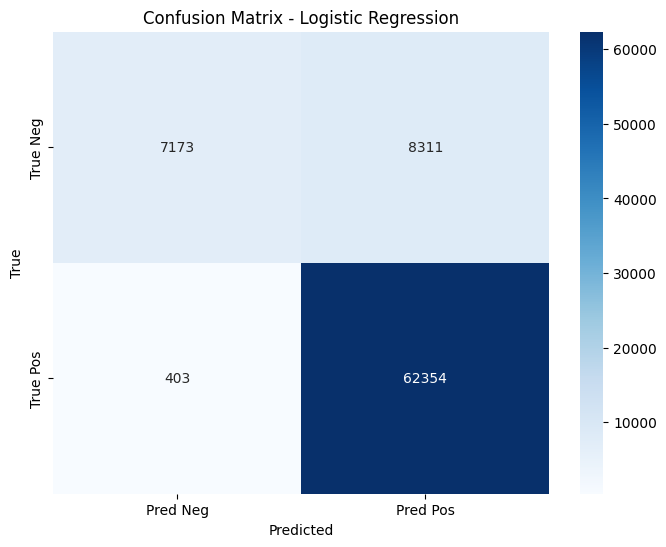


Total Correct: 69527 (88.86%)
------------------------------------------------------------
True Positives (TP): 62354 (79.69%)
True Negatives (TN): 7173 (9.17%)

Total Errors: 8714 (11.14%)
------------------------------------------------------------
False Positives (FP): 8311 (10.62%)
False Negatives (FN): 403 (0.52%)


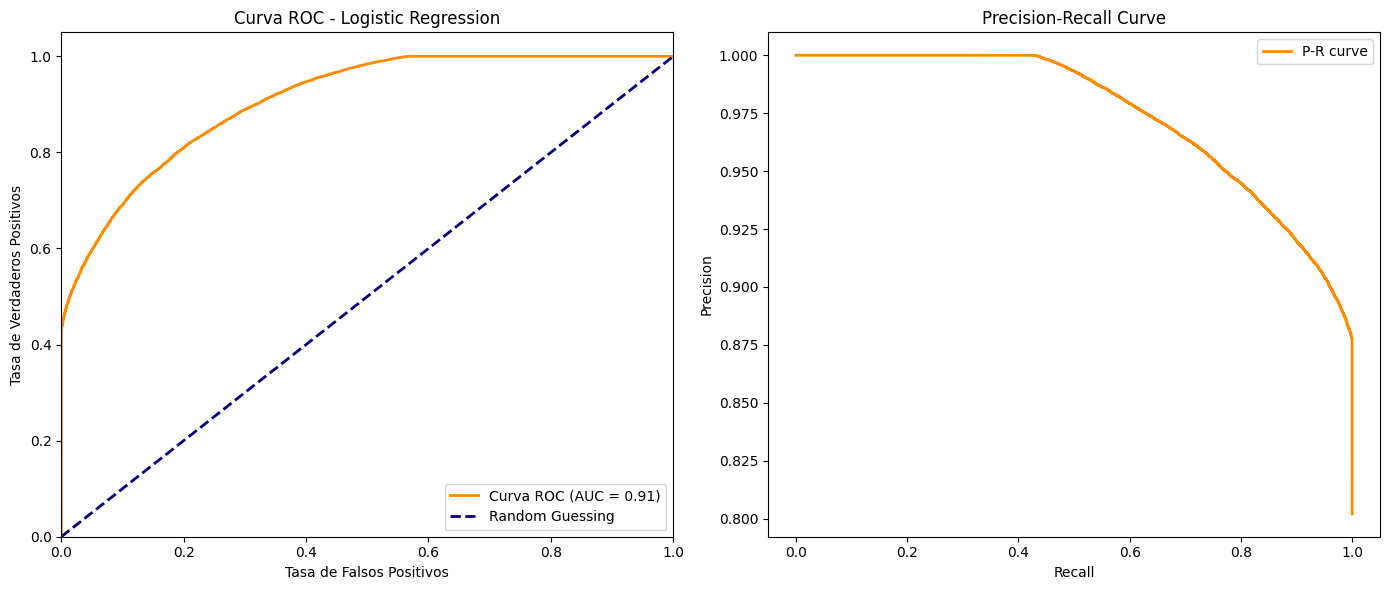

In [ ]:
# Después de obtener el mejor modelo de la búsqueda aleatoria
best_model_lr = random_search.best_estimator_

# Predicciones en los conjuntos de entrenamiento y prueba con los mejores parámetros
train_preds_lr = best_model_lr.predict(X_train_std)
test_preds_lr = best_model_lr.predict(X_test_std)

model_name_lr = 'Logistic Regression'
# Llamada a la función para imprimir métricas
print_score(y_train, train_preds_lr, model_name_lr, train=True)
print_score(y_test, test_preds_lr, model_name_lr, train=False)
# Llamada a la función para graficar la matriz de confusión
plot_confusion_matrix(best_model_lr, X_test_std, y_test, model_name_lr)
# Llamada a la función para graficar las curvas ROC y P-R
plot_roc_pr_curves(best_model_lr, X_test_std, y_test, model_name_lr)
# Llamada a la función para guardar los resultados en un archivo CSV
save_score(y_train, train_preds_lr, model_name_lr, train=True)
save_score(y_test, test_preds_lr, model_name_lr, train=False)

#### Con Gridseach y Pipeline - Entrenado en COLAB - Pruebas en la carpeta modelos

In [ ]:
# Creacion del modelo - LOGISTIC REGRESION
'''
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model_name = 'LogisticRegression'

target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciamos el PCA y el pipeline para Regresión Logística
pca = PCA(n_components=0.95)  # Elige el número de componentes que explica al menos el 95% de la varianza
reg_log = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('reglog', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Parámetros de modelo 1
reg_log_params = {
    'reglog__penalty': ['l1', 'l2'],
    'reglog__C': np.logspace(0, 4, 10)
}

# Grid search con modelo 1
gs_reg_log = GridSearchCV(reg_log, reg_log_params, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)

# Entrenamos el grid search
gs_reg_log.fit(X_train, y_train)

# Resultados del grid search para Regresión Logística
print(f'Resultados del modelo {model_name}:')
print(f'Precisión en el conjunto de entrenamiento: {gs_reg_log.best_score_:.4f}')
print(f'Mejores parámetros: {gs_reg_log.best_params_}')

# Precisión y recall en el conjunto de prueba
preds_reg_log = gs_reg_log.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, preds_reg_log)
recall = recall_score(y_test, preds_reg_log)

print(f'Precisión en el conjunto de prueba: {accuracy:.4f}')
print(f'Recall en el conjunto de prueba: {recall:.4f}')
'''

In [ ]:
# Predicciones en los conjuntos de entrenamiento y prueba con los mejores parámetros
'''
train_preds_reg_log= gs_reg_log.best_estimator_.predict(X_train)
test_preds_reg_log= gs_reg_log.best_estimator_.predict(X_test)

model_name='LogisticRegression'
# Llamada a las funciones después de entrenar el modelo
print_score(y_train, train_preds_reg_log, train=True)
print_score(y_test, test_preds_reg_log, train=False)
plot_confusion_matrix(gs_reg_log.best_estimator_, X_test, y_test, model_name)
plot_roc_pr_curves(gs_reg_log.best_estimator_, X_test, y_test, model_name)

save_score(y_train, train_preds_reg_log, model_name, train=True)
save_score(y_test, test_preds_reg_log, model_name, train=False)
'''

# ✔️ **Random Forest Classifier**

El Random Forest Classifier es un algoritmo de aprendizaje supervisado que pertenece a la categoría de ensamble de árboles de decisión. En lugar de depender de la decisión de un solo árbol, el modelo Random Forest crea múltiples árboles de decisión durante el proceso de entrenamiento y combina sus resultados para mejorar la generalización y la robustez.

Precisión en el conjunto de prueba (predeterminado): 0.8880
Recall en el conjunto de prueba (predeterminado): 0.9937

Mejores parámetros (búsqueda aleatoria): {'n_estimators': 483, 'max_features': 2}
Precisión en el conjunto de entrenamiento (búsqueda aleatoria): 0.8885
Precisión en el conjunto de prueba (búsqueda aleatoria): 0.8879
Recall en el conjunto de prueba (búsqueda aleatoria): 0.9963
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0         1  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   61457.00 251507.00      1.00  312964.00     312964.00
_______________________________________________
Confusion Matrix: 
 [[ 61457      0]
 [     0 251507]]

Test Result:
Accuracy Score: 88.79%
___________________________________

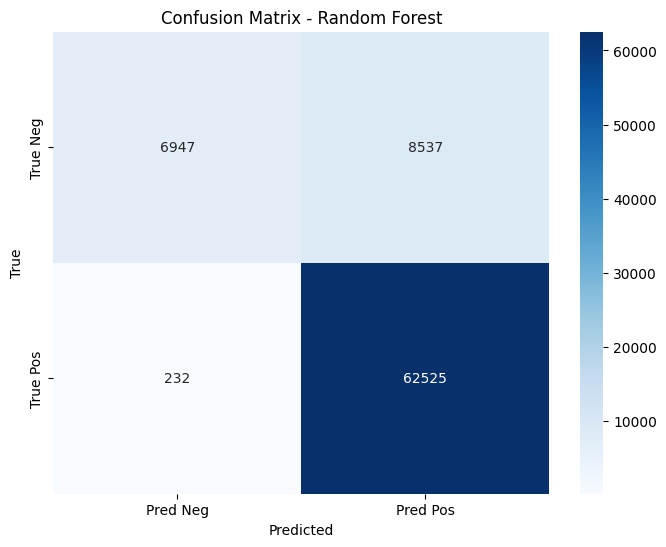


Total Correct: 69472 (88.79%)
------------------------------------------------------------
True Positives (TP): 62525 (79.91%)
True Negatives (TN): 6947 (8.88%)

Total Errors: 8769 (11.21%)
------------------------------------------------------------
False Positives (FP): 8537 (10.91%)
False Negatives (FN): 232 (0.30%)


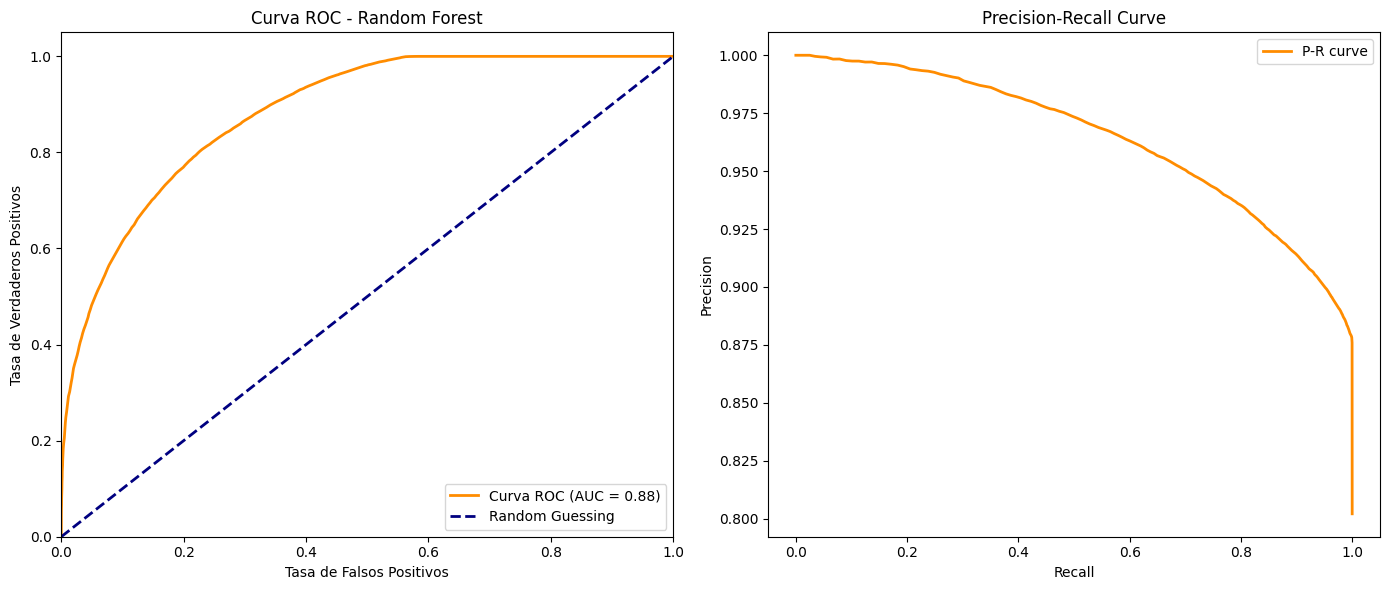

In [ ]:
# Modelo con parámetros predeterminados
model_name_rf = 'Random Forest'
rand_forest_default = RandomForestClassifier(random_state=42)

# División de datos en conjunto de entrenamiento y prueba
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo predeterminado
rand_forest_default.fit(X_train_rf, y_train_rf)

# Evaluación en el conjunto de prueba
preds_default_rf = rand_forest_default.predict(X_test_rf)
accuracy_default_rf = accuracy_score(y_test_rf, preds_default_rf)
recall_default_rf = recall_score(y_test_rf, preds_default_rf)

print(f'Precisión en el conjunto de prueba (predeterminado): {accuracy_default_rf:.4f}')
print(f'Recall en el conjunto de prueba (predeterminado): {recall_default_rf:.4f}')

# Definición de hiperparámetros (distribución logarítmica para RandomizedSearchCV)
param_dist_rf = {
    'n_estimators': [int(x) for x in np.logspace(1, 3, num=20)],
    'max_features': [1, 2, 3]
}

# Búsqueda aleatoria de hiperparámetros
rand_forest_random_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf,
                                            n_iter=10, cv=10, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenamiento del modelo con búsqueda aleatoria
rand_forest_random_rf.fit(X_train_rf, y_train_rf)

# Resultados de la búsqueda aleatoria
print(f'\nMejores parámetros (búsqueda aleatoria): {rand_forest_random_rf.best_params_}')
print(f'Precisión en el conjunto de entrenamiento (búsqueda aleatoria): {rand_forest_random_rf.best_score_:.4f}')

# Evaluación en el conjunto de prueba con los mejores parámetros
preds_random_rf = rand_forest_random_rf.best_estimator_.predict(X_test_rf)
accuracy_random_rf = accuracy_score(y_test_rf, preds_random_rf)
recall_random_rf = recall_score(y_test_rf, preds_random_rf)

print(f'Precisión en el conjunto de prueba (búsqueda aleatoria): {accuracy_random_rf:.4f}')
print(f'Recall en el conjunto de prueba (búsqueda aleatoria): {recall_random_rf:.4f}')

# Después de obtener el mejor modelo de la búsqueda aleatoria
best_model_rf = rand_forest_random_rf.best_estimator_

# Predicciones en los conjuntos de entrenamiento y prueba con los mejores parámetros
train_preds_rf = best_model_rf.predict(X_train_rf)
test_preds_rf = best_model_rf.predict(X_test_rf)

model_name_rf = 'Random Forest'
# Llamada a las funciones después de entrenar el modelo
print_score(y_train_rf, train_preds_rf, model_name_rf, train=True)
print_score(y_test_rf, test_preds_rf, model_name_rf, train=False)
# Plot Confusion Matrix
plot_confusion_matrix(best_model_rf, X_test_rf, y_test_rf, model_name_rf)
# Plot Curvas ROC y P-R
plot_roc_pr_curves(best_model_rf, X_test_rf, y_test_rf, model_name_rf)

In [ ]:
save_score(y_train, train_preds_rf, model_name_lr, train=True)
save_score(y_test, test_preds_rf, model_name_lr, train=False)

#### Con Gridseach y Pipeline - Entrenado en COLAB - Pruebas en la carpeta modelos

In [ ]:
# Creacion del modelo - RANDOM FOREST con searchgrid y pipelines
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have loaded your data into X and y
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the target variable using SimpleImputer
target_imputer = SimpleImputer(strategy='most_frequent')  # You can use a different strategy if needed
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Create a pipeline with an imputer, scaler, and RandomForestClassifier
pipeline = Pipeline([
    ('imputer', KNNImputer()),  # Impute missing values in features using KNN
    ('scaler', StandardScaler()),
    ('rand_forest', RandomForestClassifier())
])

# Parameters for Random Forest and preprocessing steps
param_grid = {
    'imputer__n_neighbors': [3, 5, 7],
    'rand_forest__n_estimators': [10, 100, 1000],
    'rand_forest__max_features': [1, 2, 3]
}

# Grid search with the pipeline
gs_rand_forest = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1, timeout=300)

# Train the grid search with the imputed target variable
gs_rand_forest.fit(X_train, y_train_imputed)

# Results of the grid search for Random Forest
print(f'Accuracy on the training set: {gs_rand_forest.best_score_:.4f}')
print(f'Best parameters: {gs_rand_forest.best_params_}')
print('Best estimator:')
print(gs_rand_forest.best_estimator_)

# Accuracy and recall on the test set
preds_rand_forest = gs_rand_forest.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, preds_rand_forest)
recall = recall_score(y_test, preds_rand_forest)

print(f'Accuracy on the test set: {accuracy:.4f}')
print(f'Recall on the test set: {recall:.4f}')
'''

In [ ]:
# Creacion del modelo - RANDOM FOREST con searchgrid y pipelines
'''
from sklearn.impute import SimpleImputer

# Imputar valores faltantes en la variable objetivo
target_imputer = SimpleImputer(strategy='most_frequent')  # Puedes ajustar la estrategia según tus necesidades
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Obtener las predicciones del modelo
threshold = 0.5  # Umbral para convertir probabilidades en clases
train_preds_rand_forest = (gs_rand_forest.best_estimator_.predict_proba(X_train)[:, 1] > threshold).astype(int)
test_preds_rand_forest = (gs_rand_forest.best_estimator_.predict_proba(X_test)[:, 1] > threshold).astype(int)

model_name = 'RandomForest'
# Llamada a las funciones después de entrenar el modelo
print_score(y_train_imputed, train_preds_rand_forest, train=True)
print_score(y_test, test_preds_rand_forest, train=False)
plot_confusion_matrix(gs_rand_forest.best_estimator_, X_test, y_test, model_name)
plot_roc_pr_curves(gs_rand_forest.best_estimator_, X_test, y_test, model_name)
# Guardar puntuaciones
save_score(y_train_imputed, train_preds_rand_forest, model_name, train=True)
save_score(y_test, test_preds_rand_forest, model_name, train=False)
'''

# ✔️ **XGBoost Classifier**

Es una técnica de ensemble que se basa en la construcción de múltiples árboles de decisión y la combinación de sus resultados para mejorar la precisión de las predicciones.

Precisión en el conjunto de prueba (modelo inicial): 0.8878
Recall en el conjunto de prueba (modelo inicial): 1.0000

Mejores parámetros (búsqueda aleatoria): {'subsample': 0.8, 'n_estimators': 69, 'max_depth': 3, 'learning_rate': 0.5}
Precisión en el conjunto de entrenamiento (búsqueda aleatoria): 0.8877
Precisión en el conjunto de prueba (mejores parámetros): 0.8878
Recall en el conjunto de prueba (mejores parámetros): 1.0000
Train Result:
Accuracy Score: 88.77%
_______________________________________________
CLASSIFICATION REPORT:
                 0         1  accuracy  macro avg  weighted avg
precision     1.00      0.88      0.89       0.94          0.90
recall        0.43      1.00      0.89       0.71          0.89
f1-score      0.60      0.93      0.89       0.77          0.87
support   61457.00 251507.00      0.89  312964.00     312964.00
_______________________________________________
Confusion Matrix: 
 [[ 26318  35139]
 [     0 251507]]

Test Result:
Accuracy Score: 88.78%


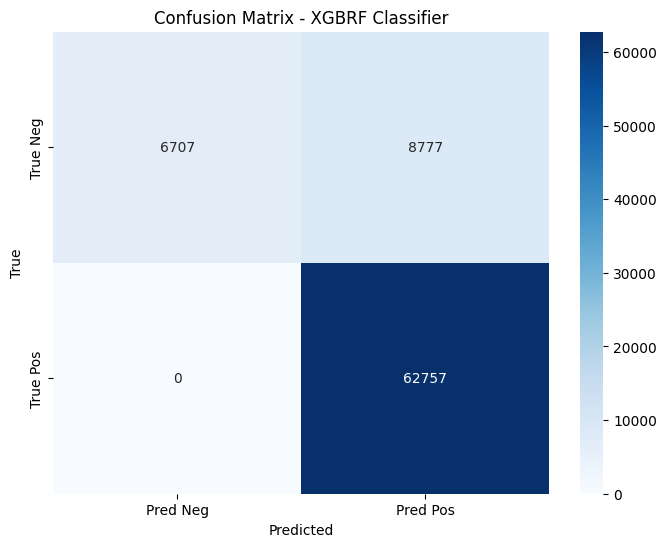


Total Correct: 69464 (88.78%)
------------------------------------------------------------
True Positives (TP): 62757 (80.21%)
True Negatives (TN): 6707 (8.57%)

Total Errors: 8777 (11.22%)
------------------------------------------------------------
False Positives (FP): 8777 (11.22%)
False Negatives (FN): 0 (0.00%)


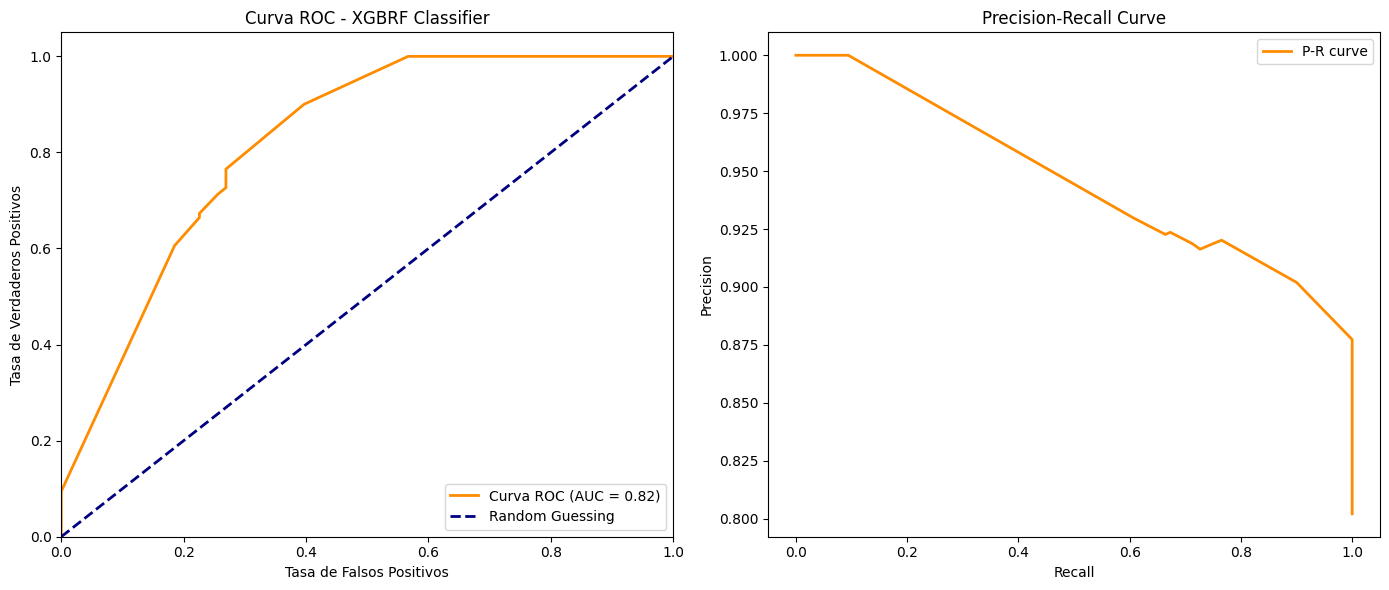

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, recall_score


xgboost_model_default = XGBRFClassifier(random_state=42)

# Entrenamiento del modelo con datos de entrenamiento
xgboost_model_default.fit(X_train, y_train)

# Predicciones en conjunto de prueba
preds_xgboost_default = xgboost_model_default.predict(X_test)

# Evaluación del modelo en el conjunto de prueba
accuracy_xgboost_default = accuracy_score(y_test, preds_xgboost_default)
recall_xgboost_default = recall_score(y_test, preds_xgboost_default)

print(f'Precisión en el conjunto de prueba (modelo inicial): {accuracy_xgboost_default:.4f}')
print(f'Recall en el conjunto de prueba (modelo inicial): {recall_xgboost_default:.4f}')

# Definición de hiperparámetros (distribución logarítmica para RandomizedSearchCV)
xgboost_params = {
    'n_estimators': [int(x) for x in np.logspace(1, 3, num=20)],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.8, 1.0],
}

# Búsqueda aleatoria de hiperparámetros
random_search_xgboost_default = RandomizedSearchCV(xgboost_model_default, xgboost_params, n_iter=10, cv=10, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenamiento del modelo con búsqueda aleatoria
random_search_xgboost_default.fit(X_train, y_train)

# Resultados de la búsqueda aleatoria
print(f'\nMejores parámetros (búsqueda aleatoria): {random_search_xgboost_default.best_params_}')
print(f'Precisión en el conjunto de entrenamiento (búsqueda aleatoria): {random_search_xgboost_default.best_score_:.4f}')

# Evaluación en el conjunto de prueba con los mejores parámetros
preds_best_xgboost_default = random_search_xgboost_default.best_estimator_.predict(X_test)
accuracy_best_xgboost_default = accuracy_score(y_test, preds_best_xgboost_default)
recall_best_xgboost_default = recall_score(y_test, preds_best_xgboost_default)

print(f'Precisión en el conjunto de prueba (mejores parámetros): {accuracy_best_xgboost_default:.4f}')
print(f'Recall en el conjunto de prueba (mejores parámetros): {recall_best_xgboost_default:.4f}')

# Después de obtener el mejor modelo de la búsqueda aleatoria
best_model_xgboost = random_search_xgboost_default.best_estimator_

# Predicciones en los conjuntos de entrenamiento y prueba con los mejores parámetros
train_preds_xgboost = best_model_xgboost.predict(X_train)
test_preds_xgboost = best_model_xgboost.predict(X_test)


# Llamada a las funciones después de entrenar el modelo
print_score(y_train, train_preds_xgboost, model_name_xgboost, train=True)
print_score(y_test, test_preds_xgboost, model_name_xgboost, train=False)

# Plot Confusion Matrix
plot_confusion_matrix(best_model_xgboost, X_test, y_test, model_name_xgboost)

# Plot Curvas ROC y P-R
plot_roc_pr_curves(best_model_xgboost, X_test, y_test, model_name_xgboost)


In [ ]:
# Después de obtener el mejor modelo de la búsqueda aleatoria
best_model_xgboost = random_search_xgboost_default.best_estimator_

# Generate predictions for both training and testing sets
train_preds_xgboost = best_model_xgboost.predict(X_train)
test_preds_xgboost = best_model_xgboost.predict(X_test)

model_name_xgboost = 'XGBRF Classifier'

# Save scores for both training and testing sets
save_score(y_train, train_preds_xgboost, model_name_xgboost, train=True)
save_score(y_test, test_preds_xgboost, model_name_xgboost, train=False)

#### Con Gridseach y Pipeline - Entrenado en COLAB - Pruebas en la carpeta modelos

In [ ]:
# Creacion del modelo - XG BOOST Classifier con Gridsearch & Pipelina
'''
from xgboost import XGBRFClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.model_selection import train_test_split

# Suponiendo que df es tu DataFrame
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

# Handle missing values in the target variable
missing_rows_train_y = y_train.isnull()
X_train_copy = X_train[~missing_rows_train_y]
y_train_copy = y_train.dropna()

# Handle missing values in the feature variables
imputer = KNNImputer()
X_train_imputed = imputer.fit_transform(X_train_copy)

# División de datos (if not already done)
X_train_final, X_test, y_train_final, y_test = train_test_split(X_train_imputed, y_train_copy, test_size=0.2, random_state=42)

# Instanciamos el PCA y el pipeline para Regresión Logística
pca = PCA(n_components=0.95)  # Elige el número de componentes que explica al menos el 95% de la varianza
xgboost = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('classifier', XGBRFClassifier(random_state=42))
])

# Parámetros para XGBoost
xgboost_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.1, 0.5, 1.0],
    'classifier__max_depth': [2, 3, 4],
    'classifier__subsample': [0.8, 1.0],
}

# Grid search con modelo XGBoost
gs_xgboost = GridSearchCV(xgboost, xgboost_params, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)

# Entrenamos el grid search
gs_xgboost.fit(X_train_final, y_train_final)

# Resultados del grid search para XGBoost
print(f'Precisión en el conjunto de entrenamiento: {gs_xgboost.best_score_:.4f}')
print(f'Mejores parámetros: {gs_xgboost.best_params_}')
print('Mejor estimador:')
print(gs_xgboost.best_estimator_)

# Precisión y recall en el conjunto de prueba
preds_xgboost = gs_xgboost.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, preds_xgboost)
recall = recall_score(y_test, preds_xgboost)

print(f'Precisión en el conjunto de prueba: {accuracy:.4f}')
print(f'Recall en el conjunto de prueba: {recall:.4f}')
'''

In [ ]:
# Obtener las predicciones del modelo
'''
threshold = 0.5  # Umbral para convertir probabilidades en clases
train_preds_xgboost = (gs_xgboost.best_estimator_.predict_proba(X_train_final)[:, 1] > threshold).astype(int)
test_preds_xgboost = (gs_xgboost.best_estimator_.predict_proba(X_test)[:, 1] > threshold).astype(int)

model_name = 'XGBoostClassifier'
# Llamada a las funciones después de entrenar el modelo
print_score(y_train_final, train_preds_xgboost, train=True)
print_score(y_test, test_preds_xgboost, train=False)
plot_confusion_matrix(gs_xgboost.best_estimator_, X_test, y_test, model_name)
plot_roc_pr_curves(gs_xgboost.best_estimator_, X_test, y_test, model_name)
save_score(y_train_final, train_preds_xgboost, model_name, train=True)
save_score(y_test, test_preds_xgboost, model_name, train=False)
'''

# ✔️ **KNN** - KNearest Neighbors Classifier

El algoritmo KNN se basa en la idea de que los puntos de datos con características similares tienden a agruparse juntos en el espacio

Precisión en el conjunto de prueba (KNN): 0.8718
Recall en el conjunto de prueba (KNN): 0.9617
Fitting 10 folds for each of 10 candidates, totalling 100 fits

Mejores parámetros (búsqueda aleatoria): {'weights': 'uniform', 'n_neighbors': 9, 'algorithm': 'brute'}
Precisión en el conjunto de entrenamiento (búsqueda aleatoria): 0.8791
Train Result:
Accuracy Score: 89.45%
_______________________________________________
CLASSIFICATION REPORT:
                 0         1  accuracy  macro avg  weighted avg
precision     0.90      0.89      0.89       0.90          0.89
recall        0.52      0.99      0.89       0.75          0.89
f1-score      0.66      0.94      0.89       0.80          0.88
support   61457.00 251507.00      0.89  312964.00     312964.00
_______________________________________________
Confusion Matrix: 
 [[ 31982  29475]
 [  3552 247955]]

Test Result:
Accuracy Score: 87.97%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1

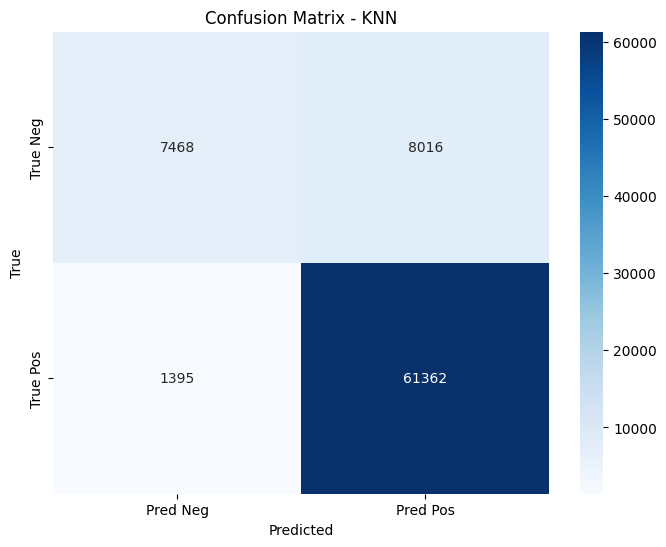


Total Correct: 68830 (87.97%)
------------------------------------------------------------
True Positives (TP): 61362 (78.43%)
True Negatives (TN): 7468 (9.54%)

Total Errors: 9411 (12.03%)
------------------------------------------------------------
False Positives (FP): 8016 (10.25%)
False Negatives (FN): 1395 (1.78%)


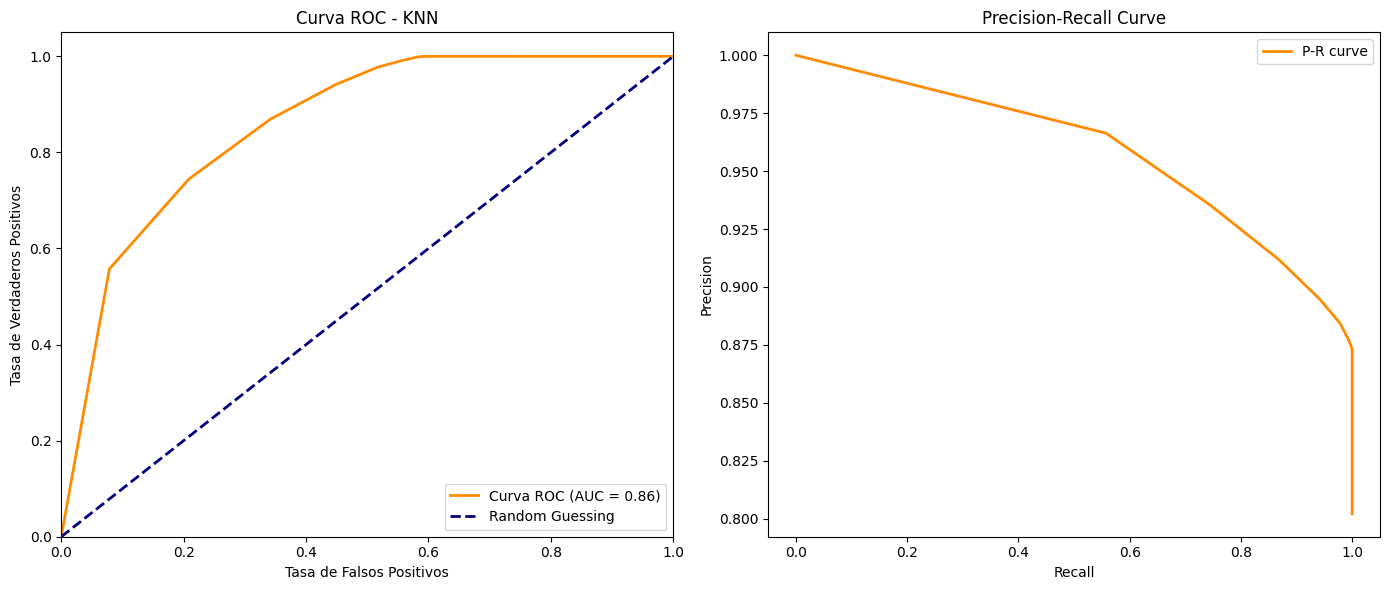

In [ ]:
# Creacion del modelo - KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de datos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Modelo KNN con hiperparámetros específicos
knn_model_default = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')

# Entrenamiento del modelo
knn_model_default.fit(X_train_std, y_train)

# Evaluación en el conjunto de prueba
preds_knn_default = knn_model_default.predict(X_test_std)
accuracy_knn_default = accuracy_score(y_test, preds_knn_default)
recall_knn_default = recall_score(y_test, preds_knn_default)

print(f'Precisión en el conjunto de prueba (KNN): {accuracy_knn_default:.4f}')
print(f'Recall en el conjunto de prueba (KNN): {recall_knn_default:.4f}')

# Definición de hiperparámetros para KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Búsqueda aleatoria de hiperparámetros para KNN
knn_search = KNeighborsClassifier()
rs_knn_default = RandomizedSearchCV(knn_search, knn_params, n_iter=10, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
rs_knn_default.fit(X_train_std, y_train)

# Resultados de la búsqueda aleatoria de hiperparámetros
print(f'\nMejores parámetros (búsqueda aleatoria): {rs_knn_default.best_params_}')
print(f'Precisión en el conjunto de entrenamiento (búsqueda aleatoria): {rs_knn_default.best_score_:.4f}')

# Entrenamiento del modelo con los mejores hiperparámetros
best_model_knn = rs_knn_default.best_estimator_
best_model_knn.fit(X_train_std, y_train)

# Evaluación en el conjunto de prueba
preds_knn_best = best_model_knn.predict(X_test_std)
accuracy_knn_best = accuracy_score(y_test, preds_knn_best)
recall_knn_best = recall_score(y_test, preds_knn_best)

# Llamada a las funciones después de entrenar el modelo
train_preds_knn = best_model_knn.predict(X_train_std)
test_preds_knn = preds_knn_best

model_name_knn = 'KNN'
print_score(y_train, train_preds_knn, model_name_knn, train=True)
print_score(y_test, test_preds_knn, model_name_knn, train=False)

plot_confusion_matrix(best_model_knn, X_test_std, y_test, model_name_knn)
plot_roc_pr_curves(best_model_knn, X_test_std, y_test, model_name_knn)

save_score(y_train, train_preds_knn, model_name_knn, train=True)
save_score(y_test, test_preds_knn, model_name_knn, train=False)

#### Con Gridseach y Pipeline - Entrenado en COLAB - Pruebas en la carpeta modelos

In [ ]:
# Modelo KNN
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

# Assuming you have already loaded your dataset into df

# Definir la variable objetivo y las características
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

# División de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar columnas de tipo 'object'
object_columns_train = X_train.select_dtypes(include='object').columns
object_columns_test = X_test.select_dtypes(include='object').columns

# Tratar columnas de tipo 'object' en conjunto de entrenamiento
if not object_columns_train.empty:
    X_train = pd.get_dummies(X_train, columns=object_columns_train)

# Tratar columnas de tipo 'object' en conjunto de prueba
if not object_columns_test.empty:
    X_test = pd.get_dummies(X_test, columns=object_columns_test)

# Asegurarse de que ambas versiones (entrenamiento y prueba) tengan las mismas columnas
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Estandarización de las características
scaler_knn = StandardScaler()
X_train_std_knn = scaler_knn.fit_transform(X_train)
X_test_std_knn = scaler_knn.transform(X_test)

# Validación cruzada con StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar el modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier()

# Realizar validación cruzada
cv_results_knn = cross_val_score(knn_model, X_train_std_knn, y_train, cv=cv, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print(f'Accuracy promedio en validación cruzada para K-Nearest Neighbors: {np.mean(cv_results_knn)}')

# Reducción de dimensionalidad mediante PCA (opcional, evalúa si es necesario)
pca_knn = PCA(n_components=0.95)  # Mantener el 95% de la varianza explicada

# Aplicar PCA a los datos de entrenamiento y prueba
X_train_pca_knn = pca_knn.fit_transform(X_train_std_knn)
X_test_pca_knn = pca_knn.transform(X_test_std_knn)

# Crear el modelo K-Nearest Neighbors después de PCA
knn_model_pca = KNeighborsClassifier()

# Entrenar el modelo en los datos transformados por PCA (opcional, evalúa si es necesario)
knn_model_pca.fit(X_train_pca_knn, y_train)

# Predicciones en el conjunto de prueba después de PCA (opcional, evalúa si es necesario)
y_pred_pca_knn = knn_model_pca.predict(X_test_pca_knn)

# Evaluación del modelo después de PCA (opcional, evalúa si es necesario)
accuracy_pca_knn = accuracy_score(y_test, y_pred_pca_knn)
print(f'Accuracy después de PCA para K-Nearest Neighbors: {accuracy_pca_knn}')

# Hiperparámetros a sintonizar (ajusta según tus necesidades)
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Inicializar RandomizedSearchCV
random_search_knn = RandomizedSearchCV(knn_model, param_distributions=param_dist_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Realizar la búsqueda aleatoria en los datos de entrenamiento estandarizados
random_search_knn.fit(X_train_std_knn, y_train)

# Obtener los mejores parámetros y evaluar el modelo
best_params_random_knn = random_search_knn.best_params_
print(f'Mejores parámetros encontrados para K-Nearest Neighbors (búsqueda aleatoria): {best_params_random_knn}')

# Después de obtener el mejor modelo de la búsqueda aleatoria
best_model_knn = random_search_knn.best_estimator_

# Predicciones en los conjuntos de entrenamiento y prueba con los mejores parámetros
train_preds_knn = best_model_knn.predict(X_train_std_knn)
test_preds_knn = best_model_knn.predict(X_test)

model_name_knn = 'K-Nearest Neighbors'
# Llamada a la función para imprimir métricas
print_score(y_train, train_preds_knn, model_name_knn, train=True)
print_score(y_test, test_preds_knn, model_name_knn, train=False)
# Llamada a la función para graficar la matriz de confusión
plot_confusion_matrix(best_model_knn, X_test_std_knn, y_test, model_name_knn)
# Llamada a la función para graficar las curvas ROC y P-R
plot_roc_pr_curves(best_model_knn, X_test_std_knn, y_test, model_name_knn)
# Llamada a la función para guardar los resultados en un archivo CSV
save_score(y_train, train_preds_knn, model_name_knn, train=True)
save_score(y_test, test_preds_knn, model_name_knn, train=False)
'''

# ✔️ **ANN** - Artificial Neural Networks / Redes Neuronales

Tipo de modelo de aprendizaje profundo que está inspirado en la estructura y el funcionamiento del cerebro humano. 

Trial 5 Complete [00h 14m 09s]
val_AUC: 0.9078555703163147

Best val_AUC So Far: 0.9078555703163147
Total elapsed time: 01h 15m 50s
Epoch 1/20
9781/9781 [==============================] - 41s 4ms/step - loss: 0.2863 - AUC: 0.8810 - val_loss: 0.2660 - val_AUC: 0.9016
Epoch 2/20
9781/9781 [==============================] - 38s 4ms/step - loss: 0.2671 - AUC: 0.8963 - val_loss: 0.2623 - val_AUC: 0.9040
Epoch 3/20
9781/9781 [==============================] - 38s 4ms/step - loss: 0.2648 - AUC: 0.8985 - val_loss: 0.2608 - val_AUC: 0.9064
Epoch 4/20
9781/9781 [==============================] - 38s 4ms/step - loss: 0.2634 - AUC: 0.9001 - val_loss: 0.2580 - val_AUC: 0.9072
Epoch 5/20
9781/9781 [==============================] - 38s 4ms/step - loss: 0.2623 - AUC: 0.9012 - val_loss: 0.2581 - val_AUC: 0.9073
Epoch 6/20
9781/9781 [==============================] - 38s 4ms/step - loss: 0.2619 - AUC: 0.9016 - val_loss: 0.2598 - val_AUC: 0.9076
Epoch 7/20
9781/9781 [==============================] - 39

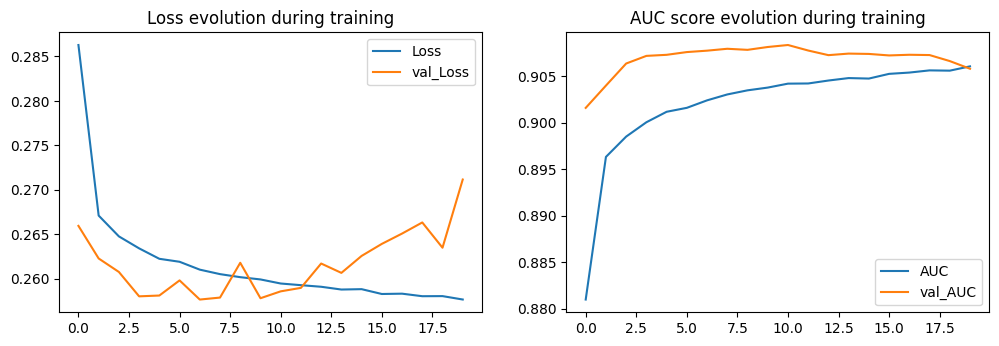

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kerastuner.tuners import RandomSearch

target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_nn(true, pred, train=True):
    # Convierte las predicciones a etiquetas de clase binarias
    pred_bin = [1 if p >= 0.5 else 0 for p in pred]

    if train:
        clf_report = pd.DataFrame(classification_report(true, pred_bin, output_dict=True))
        acc = accuracy_score(true, pred_bin) * 100

        print("Train Result:\n================================================")
        print(f"Accuracy Score: {acc:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred_bin)}\n")

    elif not train:
        clf_report = pd.DataFrame(classification_report(true, pred_bin, output_dict=True))
        acc = accuracy_score(true, pred_bin) * 100

        print("Test Result:\n================================================")
        print(f"Accuracy Score: {acc:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred_bin)}\n")

def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during training')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during training')
    plt.legend();

def build_model(hp):
    num_columns = X_train.shape[1]
    num_labels = 1

    model = keras.Sequential()

    model.add(layers.BatchNormalization(input_shape=(num_columns,)))

    # Tune the number of layers and units in each layer
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                               activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(layers.Dense(num_labels, activation='sigmoid'))

    # Tune the learning rate
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name='AUC')])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_AUC',
    max_trials=5,  # Número de combinaciones de hiperparámetros a probar
    directory='my_dir',
    project_name='my_project'
)

# Normalización de datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Asegurarse de que los datos sean de tipo float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Obtiene los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Construir el modelo con los mejores hiperparámetros y entrenar
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluar el modelo y mostrar resultados
evaluate_nn(y_test, best_model.predict(X_test), train=False)
plot_learning_evolution(history)

In [ ]:
# Obtener las predicciones del modelo
threshold = 0.5  # Umbral para convertir probabilidades en clases
train_preds_ann = (best_model.predict(X_train) > threshold).astype(int)
test_preds_ann = (best_model.predict(X_test) > threshold).astype(int)

model_name = 'ANN'

print_score(y_train, train_preds_ann, model_name, train=True)
print_score(y_test, test_preds_ann, model_name, train=False)


2446/2446 [==============================] - 4s 2ms/step
Train Result:
Accuracy Score: 88.89%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.97      0.88      0.89       0.92          0.90
recall        0.45      1.00      0.89       0.72          0.89
f1-score      0.61      0.94      0.89       0.77          0.87
support   61457.00 251507.00      0.89  312964.00     312964.00
_______________________________________________
Confusion Matrix: 
 [[ 27660  33797]
 [   968 250539]]

Test Result:
Accuracy Score: 88.85%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.96     0.88      0.89       0.92          0.90
recall        0.45     1.00      0.89       0.73          0.89
f1-score      0.62     0.93      0.89       0.78          0.87
support   15484.00 62757.00      0.89   78241.00    

  38/2446 [..............................] - ETA: 19s

2446/2446 [==============================] - 19s 8ms/step


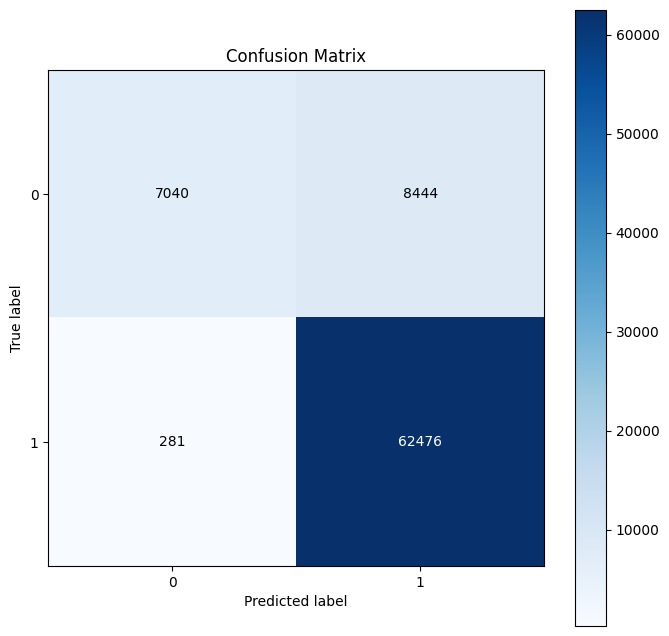

In [ ]:
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión para el conjunto de prueba
cm = confusion_matrix(y_test, best_model.predict(X_test).round())

# Visualizar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Anotar los valores en cada celda
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()

In [ ]:
threshold = 0.5
y_test_pred = (best_model.predict(X_test) > threshold).astype(int)

cm_model = confusion_matrix(y_test, y_test_pred)

# Obtener los valores de la matriz de confusión
tn, fp, fn, tp = cm_model.ravel()

# Calcular porcentajes
total = tn + fp + fn + tp
accuracy = (tp + tn) / total * 100
error_rate = (fp + fn) / total * 100
precision = tp / (tp + fp) * 100 if (tp + fp) != 0 else 0
recall = tp / (tp + fn) * 100 if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Calcular total de positivos y negativos con sus porcentajes
total_correct = tp + tn
total_errors = fp + fn
percent_correct = total_correct / total * 100
percent_errors = total_errors / total * 100

# Mostrar resultados
print(f"\nTotal Correct: {total_correct} ({percent_correct:.2f}%)")
print('--'*60)
print(f"True Positives (TP): {tp} ({tp/total*100:.2f}%)")
print(f"True Negatives (TN): {tn} ({tn/total*100:.2f}%)")

print(f"\nTotal Errors: {total_errors} ({percent_errors:.2f}%)")
print('--'*60)
print(f"False Positives (FP): {fp} ({fp/total*100:.2f}%)")
print(f"False Negatives (FN): {fn} ({fn/total*100:.2f}%)")

  50/2446 [..............................] - ETA: 16s

2446/2446 [==============================] - 21s 8ms/step

Total Correct: 69516 (88.85%)
------------------------------------------------------------------------------------------------------------------------
True Positives (TP): 62476 (79.85%)
True Negatives (TN): 7040 (9.00%)

Total Errors: 8725 (11.15%)
------------------------------------------------------------------------------------------------------------------------
False Positives (FP): 8444 (10.79%)
False Negatives (FN): 281 (0.36%)


2446/2446 [==============================] - 20s 8ms/step


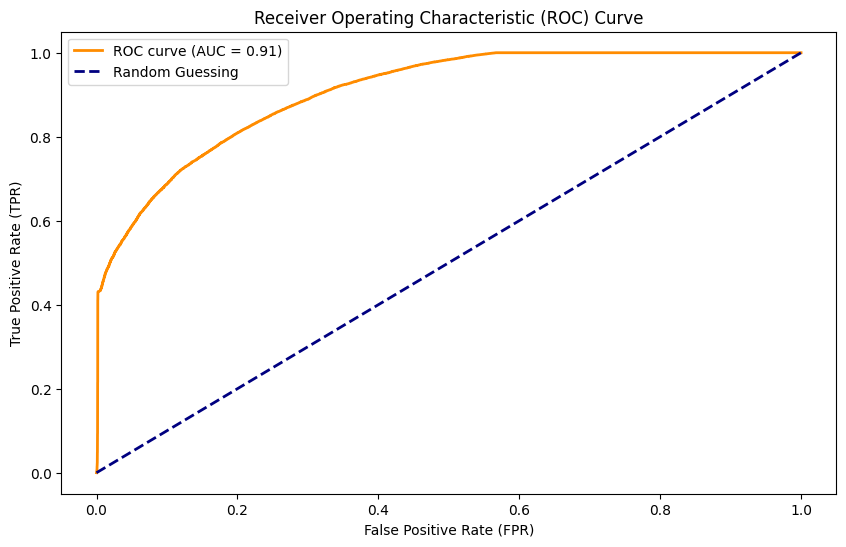

In [ ]:
from sklearn.metrics import roc_curve, auc

# La curva ROC (Receiver Operating Characteristic) es una herramienta gráfica que representa el rendimiento de un modelo de clasificación en todos los umbrales de decisión. La curva ROC muestra la tasa de verdaderos positivos (TPR, Sensibilidad) en el eje y y la tasa de falsos positivos (FPR) en el eje x.
# Es útil para evaluar cómo cambia el rendimiento del modelo a medida que se ajusta el umbral de decisión.

# Obtener las predicciones
y_pred = best_model.predict(X_test)
# Calcular las probabilidades para la clase positiva (clase 1)
y_pred_proba = y_pred.flatten()  # Asumiendo que el modelo tiene una única salida y es la probabilidad de la clase positiva
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Con Gridseach y Pipeline - Entrenado en COLAB - Pruebas en la carpeta modelos

In [ ]:
# Creacion de modelo - ANN con gridsearch y pipelines
'''
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

# Suponiendo que df es tu DataFrame y 'loan_status' es tu columna objetivo
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline para ANN
pca_ann = PCA(n_components=None) # None/0.95
ann = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', pca_ann),
    ('selectkbest', SelectKBest()),
    ('ann', MLPClassifier())
])

# Parámetros para ANN
ann_params = {
    'selectkbest__k': [2, 3, 4],
    'ann__hidden_layer_sizes': [(100,), (50, 50), (30, 20, 10)],
    'ann__activation': ['relu', 'tanh', 'logistic'],
    'ann__solver': ['sgd', 'adam'],
    'ann__alpha': [0.0001, 0.001, 0.01],
    'ann__learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Grid search con modelo ANN
gs_ann = GridSearchCV(ann, ann_params, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)

# Entrenamos el grid search
gs_ann.fit(X_train, y_train)

# Resultados del grid search para ANN
print(f'Precisión en el conjunto de entrenamiento: {gs_ann.best_score_:.4f}')
print(f'Mejores parámetros: {gs_ann.best_params_}')
print('Mejor estimador:')
print(gs_ann.best_estimator_)

# Precisión y recall en el conjunto de prueba
preds_ann = gs_ann.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, preds_ann)
recall = recall_score(y_test, preds_ann)

print(f'Precisión en el conjunto de prueba: {accuracy:.4f}')
print(f'Recall en el conjunto de prueba: {recall:.4f}')
'''


In [ ]:
# Llamada a funciones Modelo ANN con Gridsearch y pipelines
'''
train_preds_ann = gs_ann.best_estimator_.predict(X_train)
test_preds_ann = gs_ann.best_estimator_.predict(X_test)

model_name = 'ANN'
# Llamada a las funciones después de entrenar el modelo
print_score(y_train, train_preds_ann, train=True)
print_score(y_test, test_preds_ann, train=False)
plot_confusion_matrix(gs_ann.best_estimator_, X_test, y_test, model_name)
plot_roc_pr_curves(gs_ann.best_estimator_, X_test, y_test, model_name)

save_score(y_train, train_preds_ann, model_name, train=True)
save_score(y_test, test_preds_ann, model_name, train=False)
'''

# 📊 Comparing Models Performance

In [ ]:
from sklearn.metrics import roc_auc_score

# Definir tus modelos (reemplaza con tus propios modelos)
ml_models = {
    'Logistic Regression': best_model,
    # 'Decision Tree': dt_clf,
    'Random Forest': test_preds_best_xgboost, 
    'XGBoost': test_preds_best_xgboost, 
    'KNN': test_preds_knn,
    'ANN': best_model
}

# Crear un diccionario para almacenar los resultados
scores_dict = {}

# Calcular y agregar los resultados al diccionario
for model_name, model in ml_models.items():
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    scores_dict[model_name] = {'roc_auc_score': roc_auc}

# Ordenar el diccionario por roc_auc_score de menor a mayor
sorted_scores = dict(sorted(scores_dict.items(), key=lambda x: x[1]['roc_auc_score']))

# Mostrar los resultados ordenados
for model_name, scores in sorted_scores.items():
    print(f"{model_name.upper():{30}} roc_auc_score: {scores['roc_auc_score']:.3f}")

NameError: name 'dt_clf' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Desactivar las advertencias
warnings.filterwarnings("ignore", category=FutureWarning)

# Leer los DataFrames de train y test
train_data = pd.read_csv('./Pruebas/Prueba_ANN_train_2023-11.csv')
test_data = pd.read_csv('./Pruebas/Prueba_ANN_test_2023-11.csv')

# Agregar una columna 'set' para indicar si es train o test
train_data['set'] = 'train'
test_data['set'] = 'test'

# Combinar ambos DataFrames
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Filtrar solo las columnas 'roc_auc'
roc_auc_columns = [col for col in combined_data.columns if 'roc_auc' in col]

# Filtrar el DataFrame para obtener solo las columnas 'roc_auc'
roc_auc_data = combined_data[['set'] + roc_auc_columns]

# Melt para convertir el DataFrame a un formato más largo
roc_auc_melted = roc_auc_data.melt(id_vars='set', var_name='Model', value_name='ROC AUC')

# Graficar usando seaborn
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y='ROC AUC', hue='set', data=roc_auc_melted)
# Rotar los nombres de los modelos en el eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('ROC AUC Comparison between Train and Test')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './Pruebas/Prueba_ANN_train_2023-11.csv'

In [ ]:
from sklearn.metrics import roc_auc_score

# Crear un diccionario para almacenar los resultados
scores_dict = {}

# Definir tus modelos
ml_models = {
    'Logistic Regresion': model_lr,
    'Decision Tree': dt_clf,
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'KNN': knn,
    'ANN': model
}

# Calcular y agregar los resultados al diccionario
for model_name, model in ml_models.items():
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    scores_dict[model_name] = {'roc_auc_score': roc_auc}

# Ordenar el diccionario por roc_auc_score de menor a mayor
sorted_scores = dict(sorted(scores_dict.items(), key=lambda x: x[1]['roc_auc_score']))

# Mostrar los resultados ordenados
for model_name, scores in sorted_scores.items():
    print(f"{model_name.upper():{30}} roc_auc_score: {scores['roc_auc_score']:.3f}")

KNN                            roc_auc_score: 0.500
XGBOOST                        roc_auc_score: 0.717
DECISION TREE                  roc_auc_score: 0.717
RANDOM FOREST                  roc_auc_score: 0.717
LOGISTIC REGRESION             roc_auc_score: 0.729
ANN                            roc_auc_score: 0.729


In [ ]:
ml_models = {
    'Logistic Regresion': model_lr,
    'Decision Tree': dt_clf,
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'KNN': knn,
    'ANNs': model
}

for model in ml_models:
    (f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_train, ml_models[model].predict(X_train)):.3f}")
    (f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh(
    width=500, height=400, 
    title="ROC Scores of ML Models", xlabel="ROC Scores", 
    alpha=0.4, legend='top'
)

NameError: name 'model_lr' is not defined

Basándonos en los valores de AUC-ROC para los diferentes modelos en los conjuntos de entrenamiento y prueba, aquí hay algunas conclusiones que se pueden extraer:

Mejor desempeño en el conjunto de prueba: El modelo de Redes Neuronales Artificiales (ANNs) obtuvo el AUC-ROC más alto tanto en el conjunto de entrenamiento (0.908) como en el conjunto de prueba (0.906), lo que sugiere que es el modelo que mejor generaliza a datos no vistos. Esto indica un buen rendimiento del modelo ANNs en este caso.

Overfitting: El modelo Random Forest tiene un AUC-ROC cercano a 1 en el conjunto de entrenamiento (0.9999), lo que indica un posible sobreajuste (overfitting) a los datos de entrenamiento. Sin embargo, su rendimiento en el conjunto de prueba es considerablemente más bajo (0.724), lo que sugiere que no generaliza bien a nuevos datos.

Decisión Tree: El modelo Decision Tree obtiene un AUC-ROC similar en ambos conjuntos (0.714 en entrenamiento y prueba), lo que sugiere un rendimiento consistente, aunque no es el más alto.

XGBoost: El modelo XGBoost obtiene un AUC-ROC en el conjunto de prueba (0.734) que es relativamente bajo en comparación con ANNs, pero aún así es mejor que Random Forest. En este caso, parece haber un equilibrio entre el rendimiento y la generalización.

En general, si el AUC-ROC es la métrica principal y se busca un buen rendimiento en datos no vistos, el modelo de Redes Neuronales Artificiales (ANNs) parece ser la mejor opción. Sin embargo, es importante tener en cuenta que la elección del modelo también depende de otros factores, como el tiempo de entrenamiento, la interpretabilidad del modelo y los recursos disponibles. La evaluación del modelo debe considerar todos estos aspectos antes de tomar una decisión final.